In [1]:
from sklearn.preprocessing import OneHotEncoder
import seaborn as sb
import numpy as np
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import pandas as pd


In [3]:
data = pd.read_csv('del_outlier.csv')
data.keys()

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status',
       'meal_type_1', 'meal_type_2', 'meal_type_3', 'meal_type_4',
       'room_type_1', 'room_type_2', 'room_type_3', 'room_type_4',
       'room_type_5', 'room_type_6', 'room_type_7', 'Corporate',
       'Complementary', 'Online', 'Offline', 'Aviation',
       'lead_time_under_iqr_1', 'lead_time_under_iqr_2',
       'lead_time_under_iqr_3', 'lead_time_under_iqr_4', 'price_under_iqr_1',
       'price_under_iqr_2', 'price_under_iqr_3', 'price_under_iqr_4',
       'lead_time_norm', 'price_norm'],
      dtype='object')

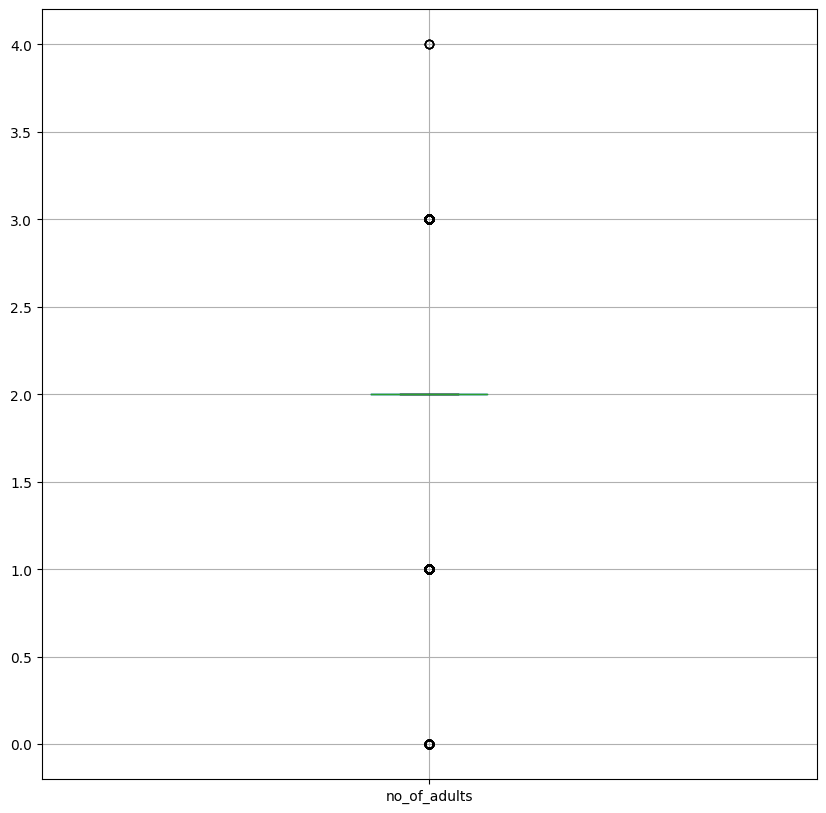

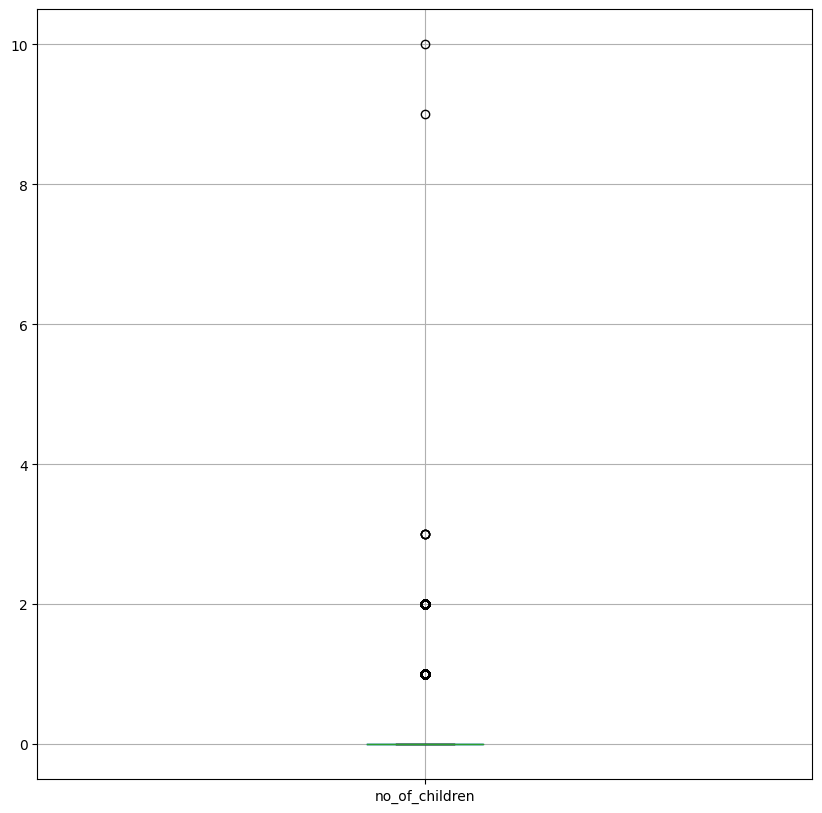

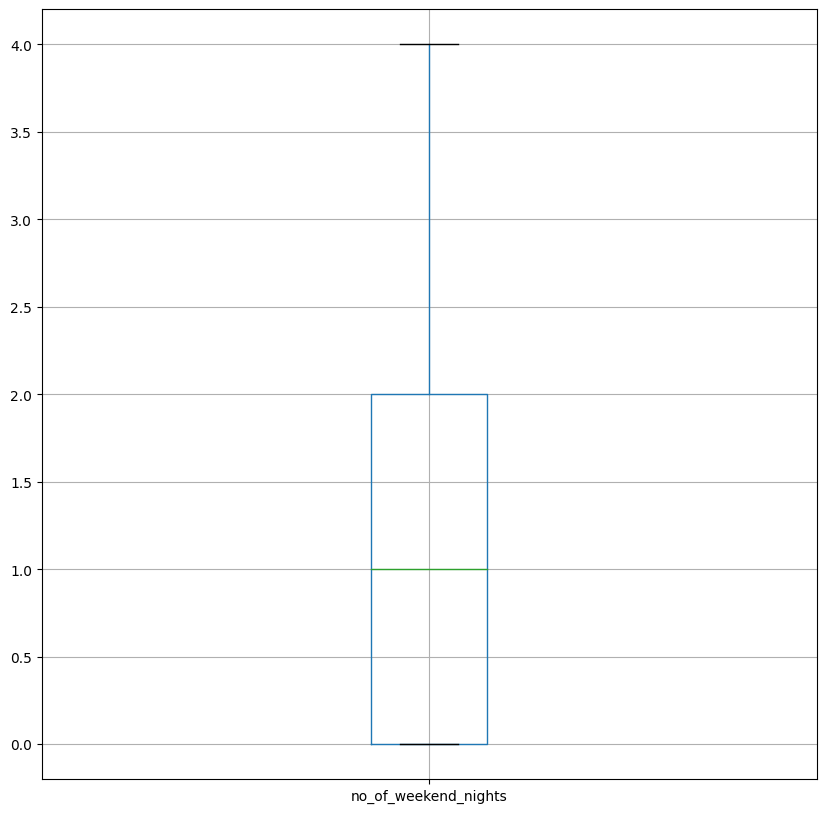

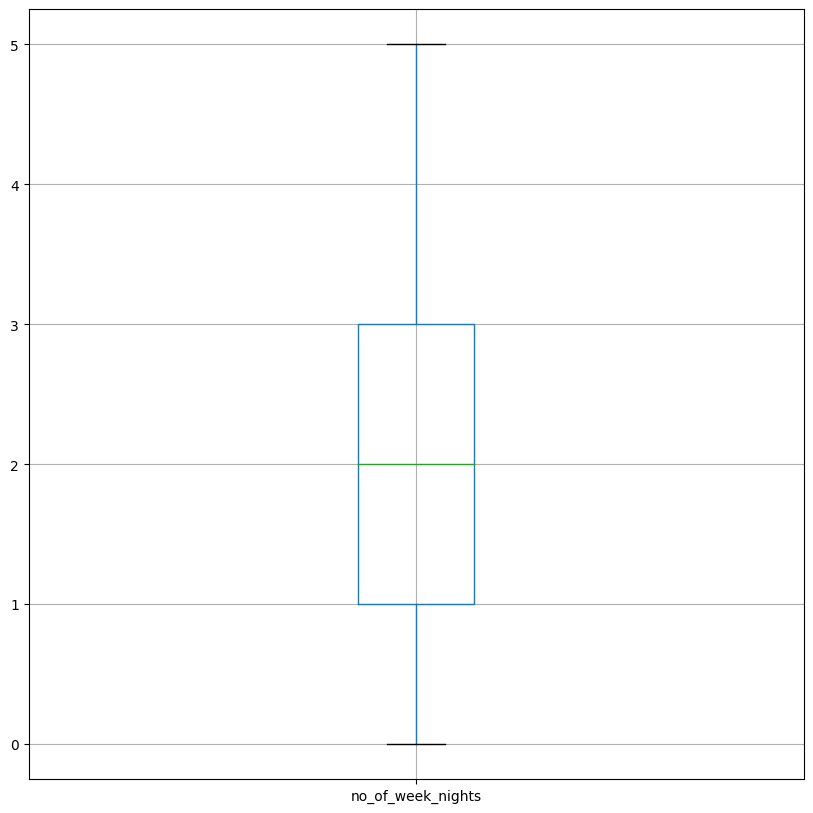

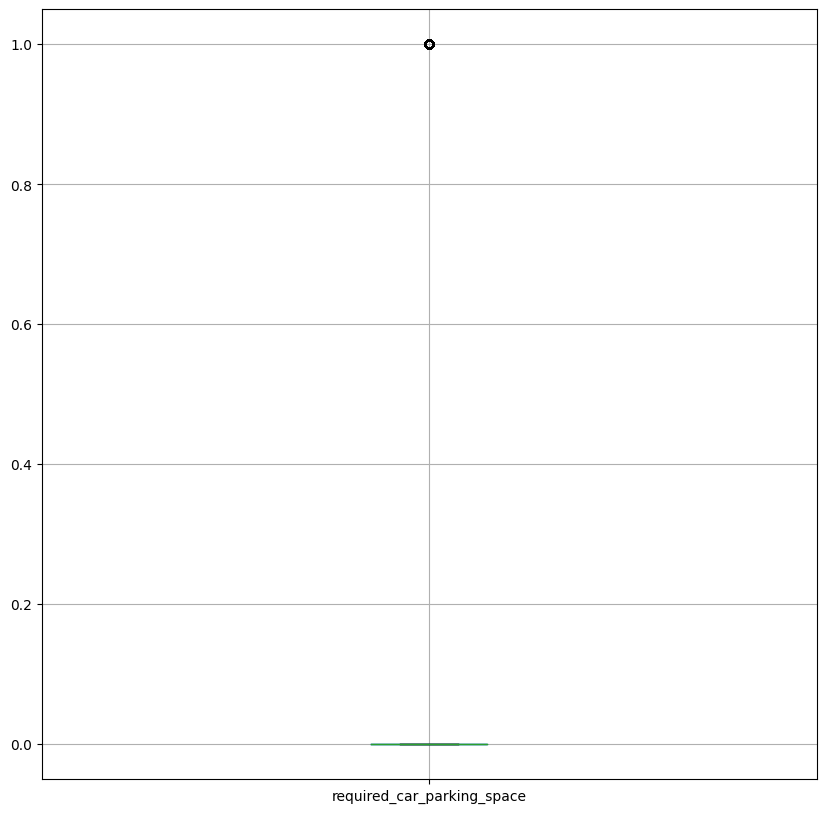

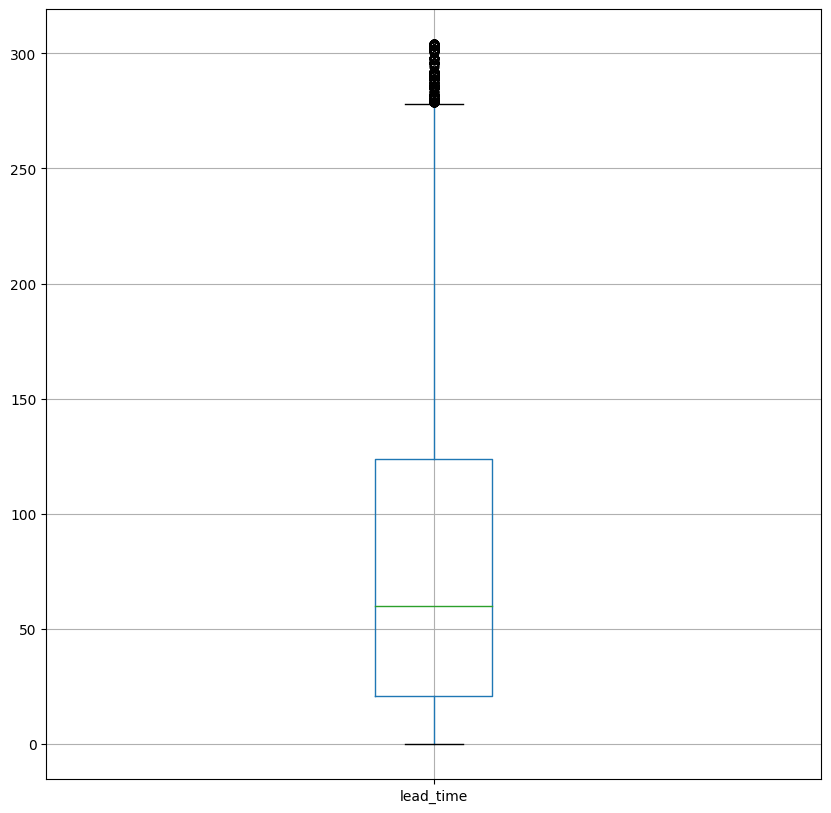

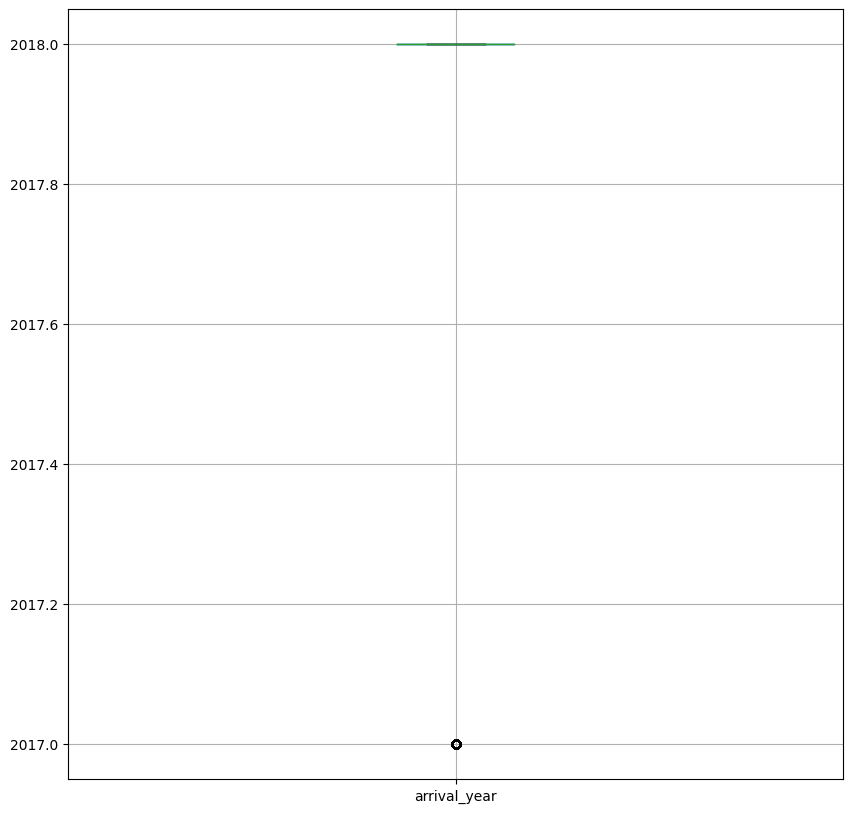

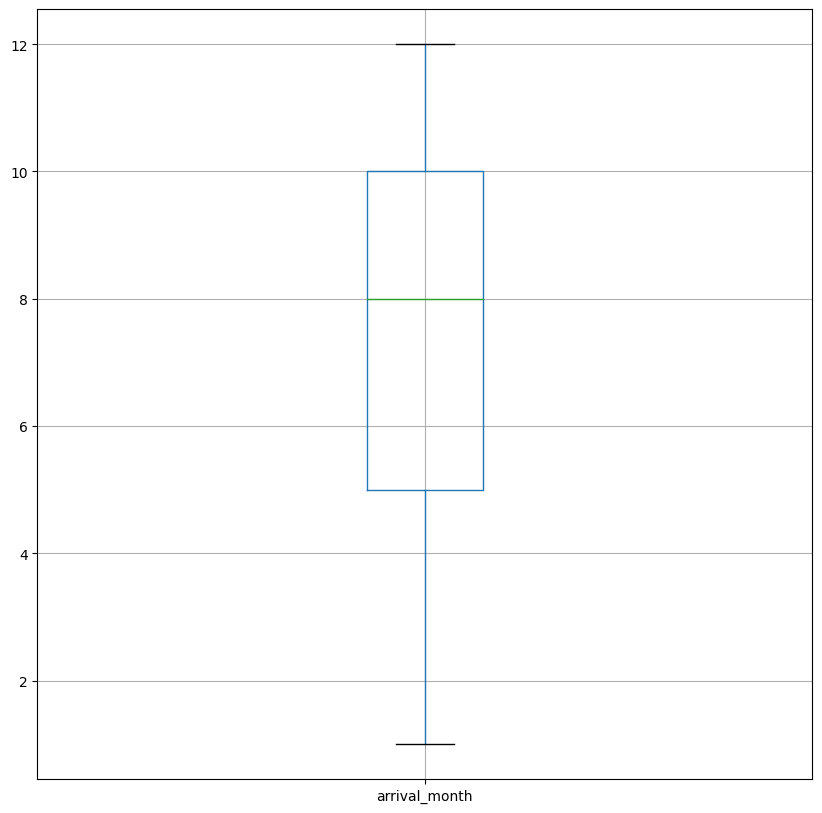

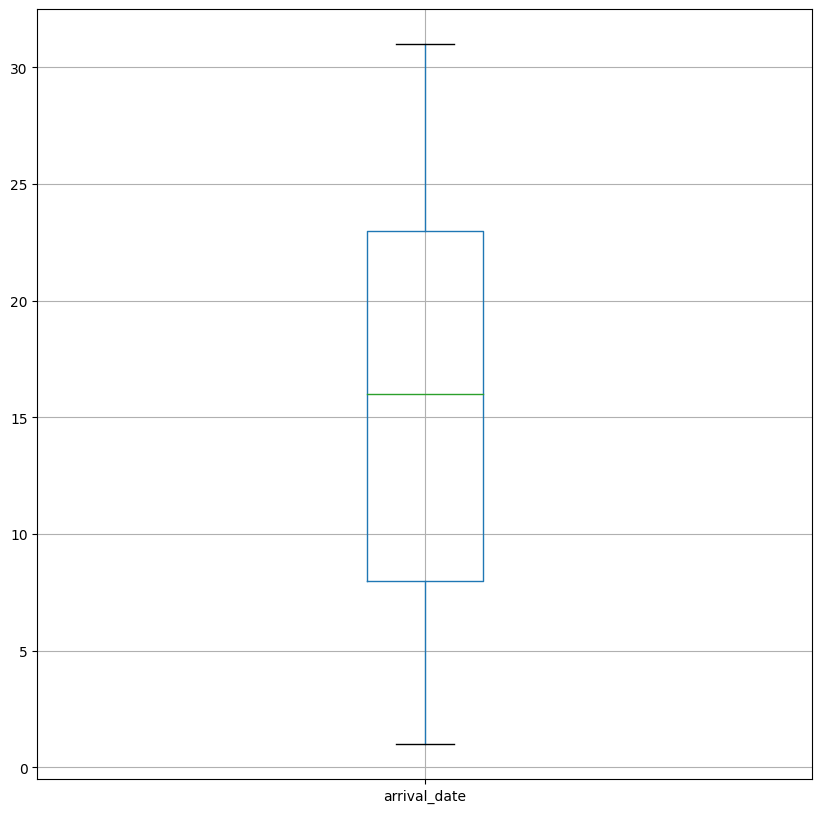

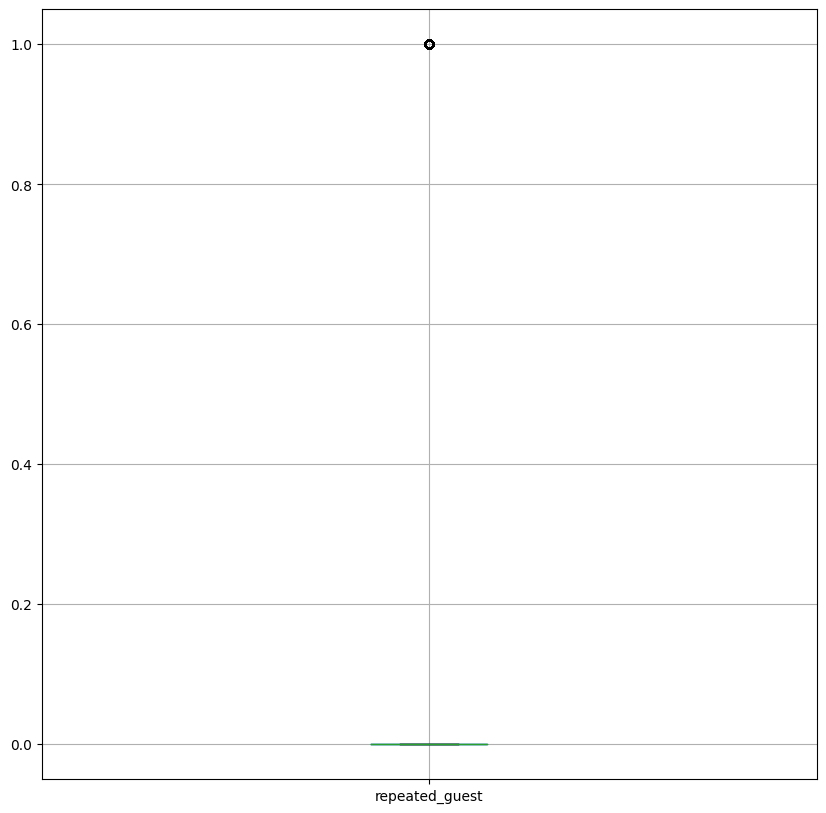

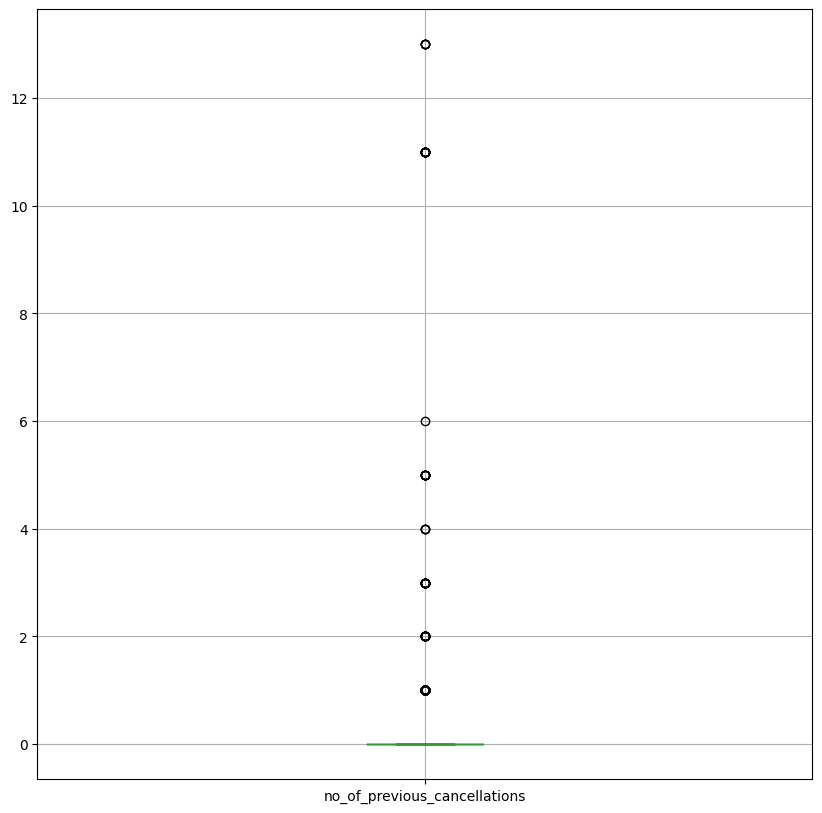

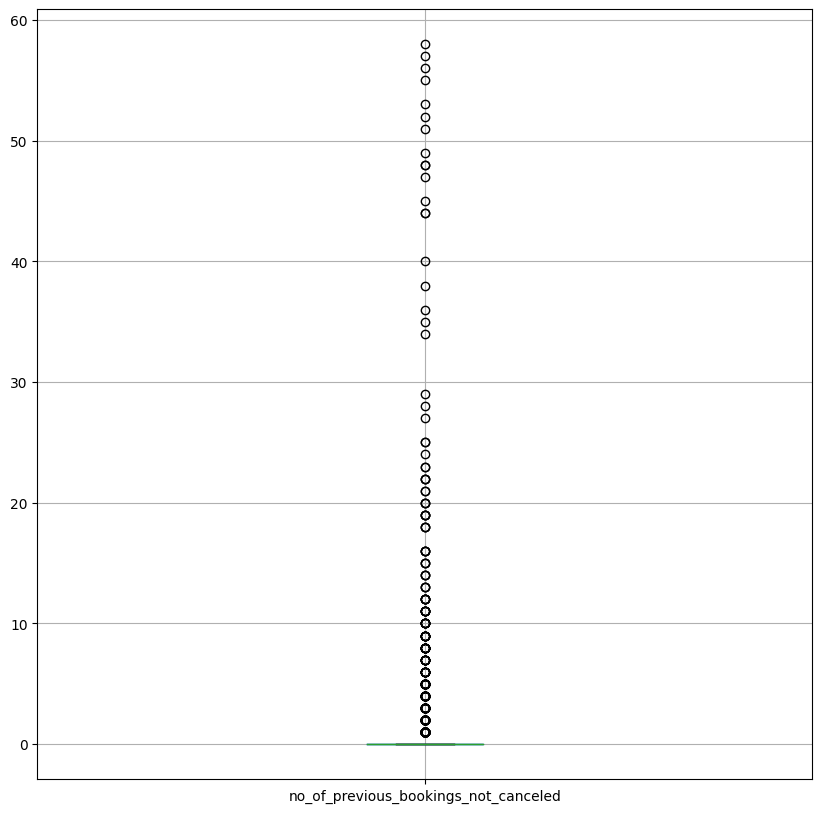

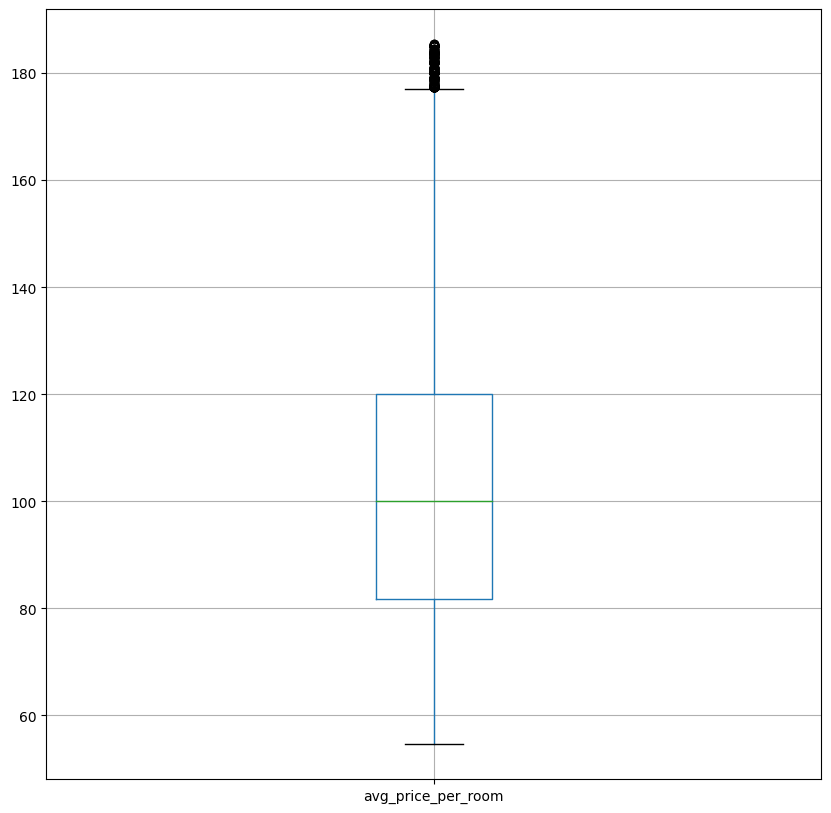

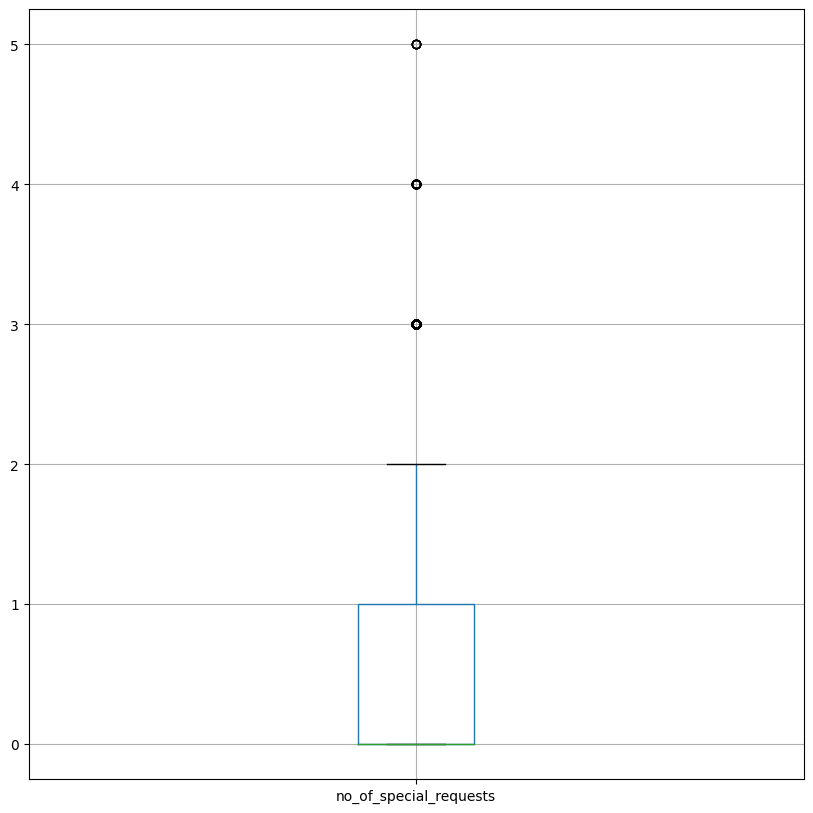

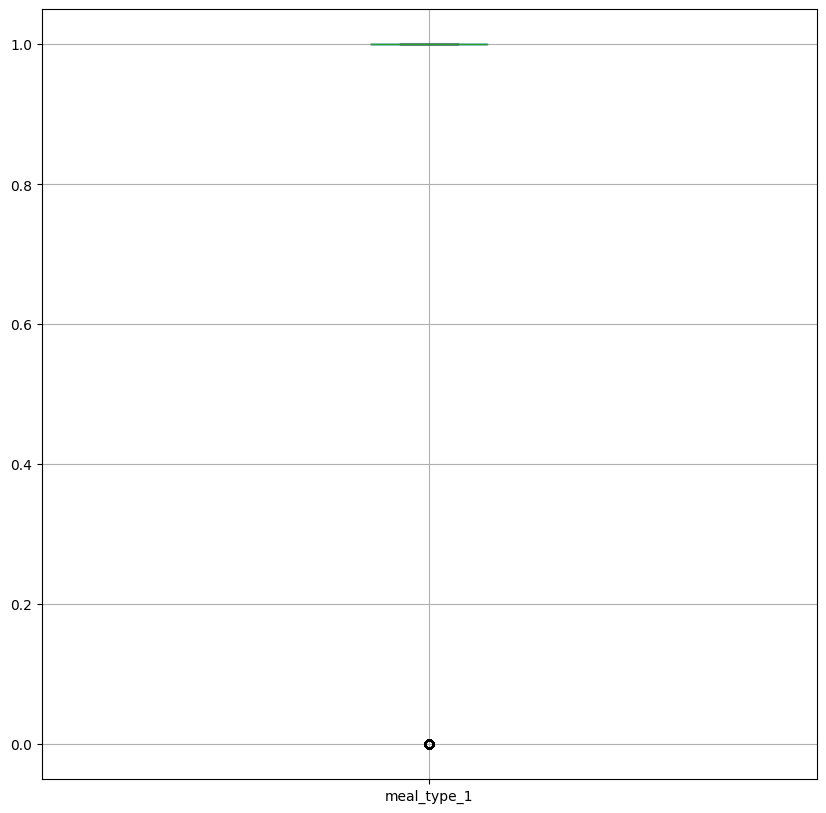

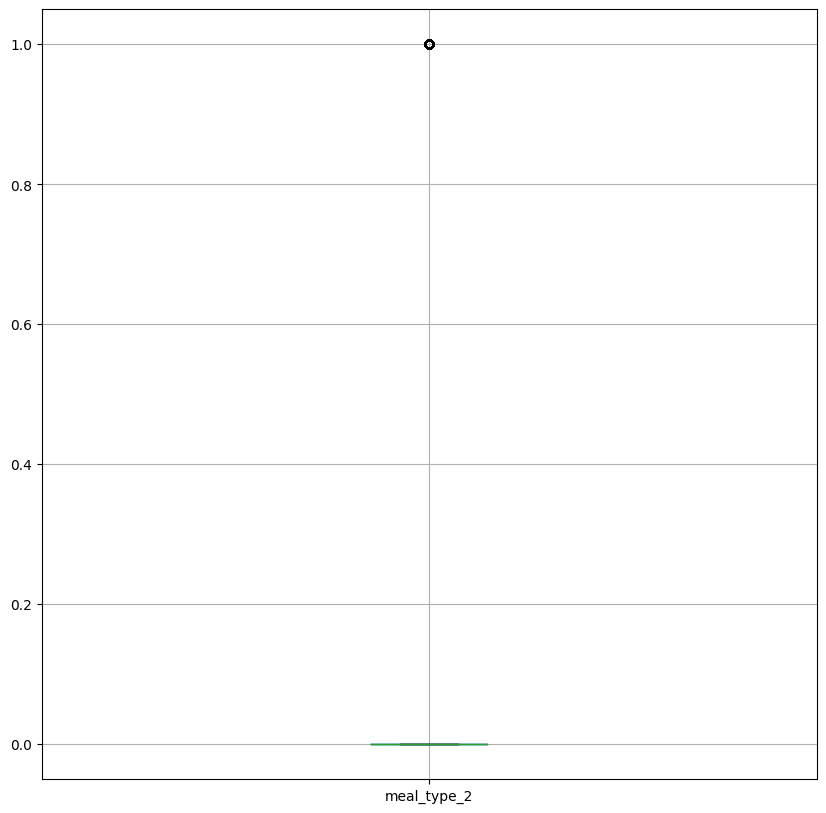

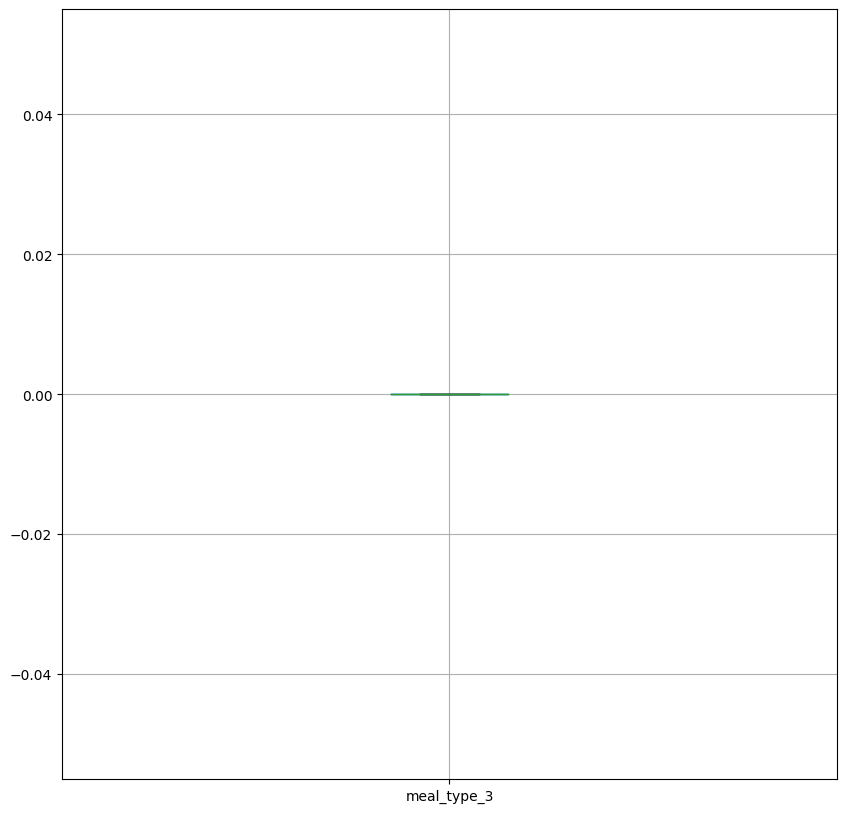

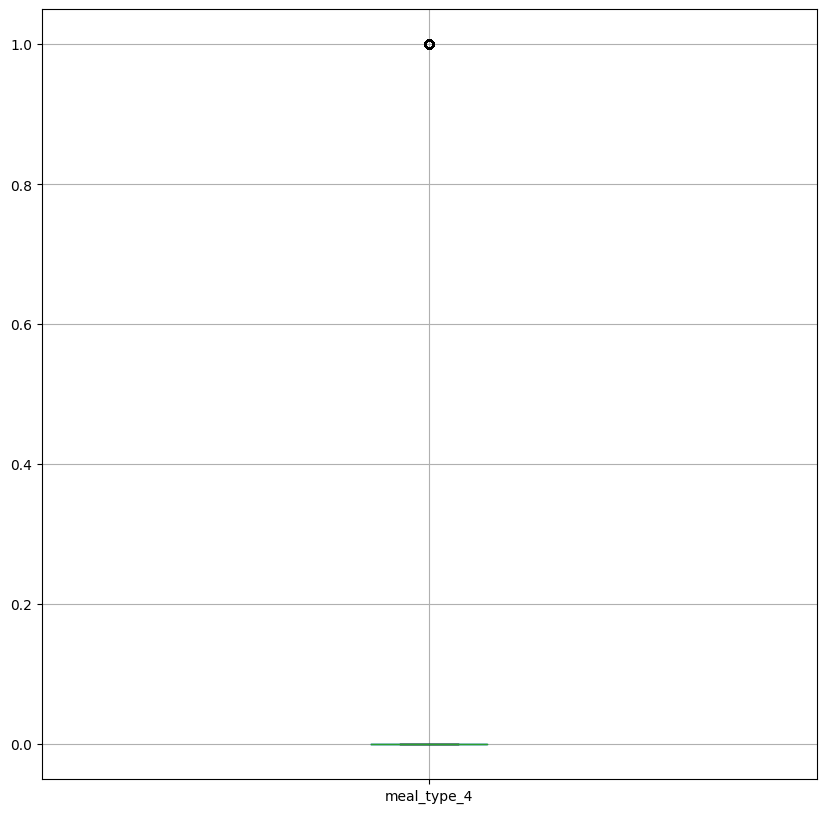

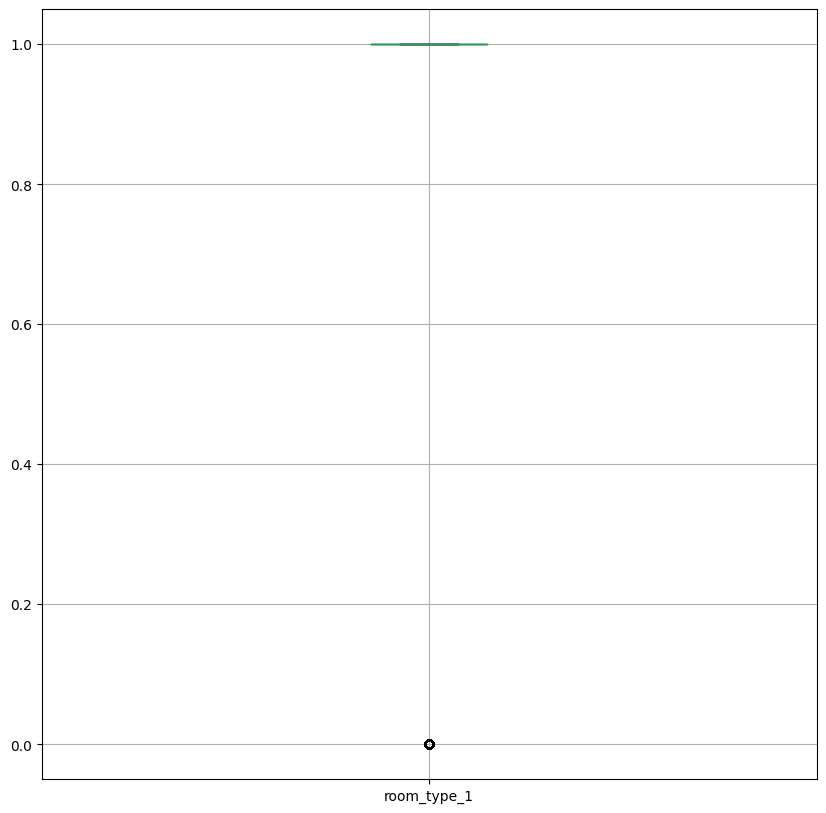

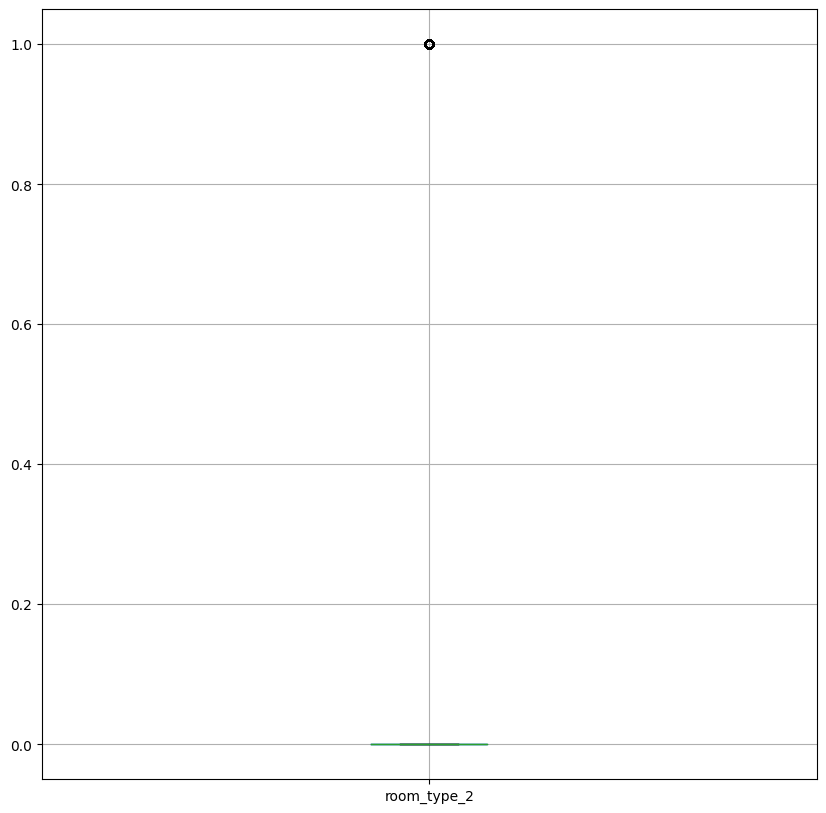

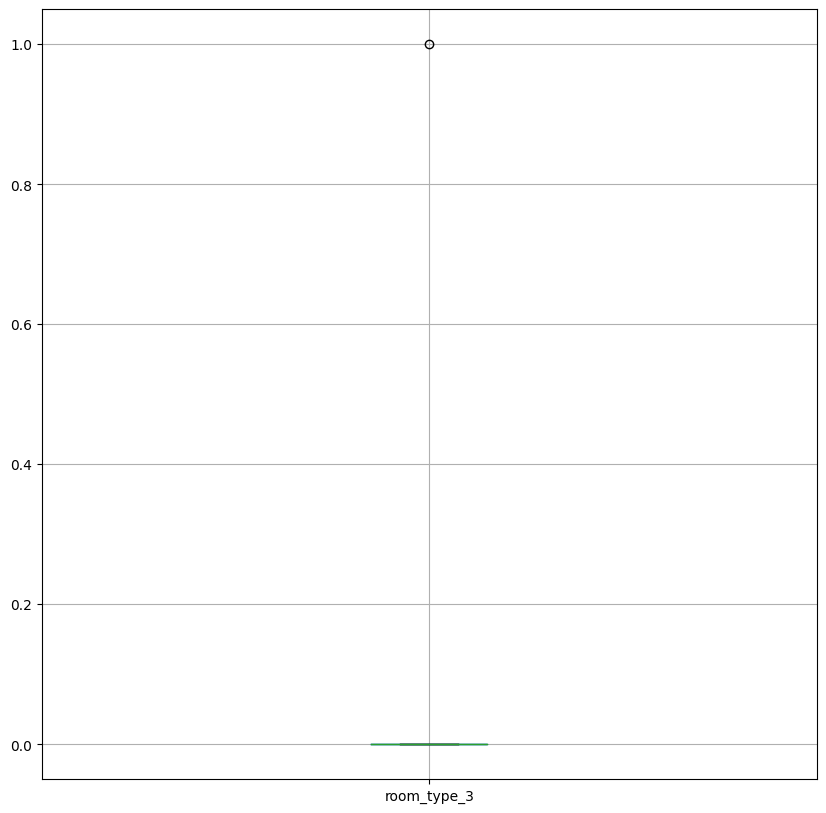

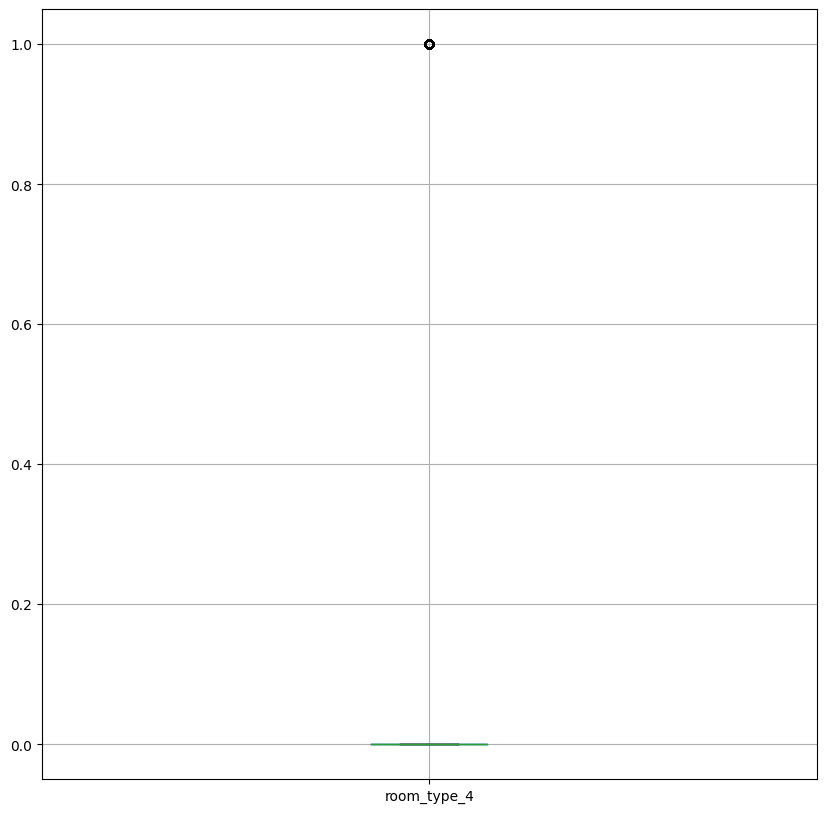

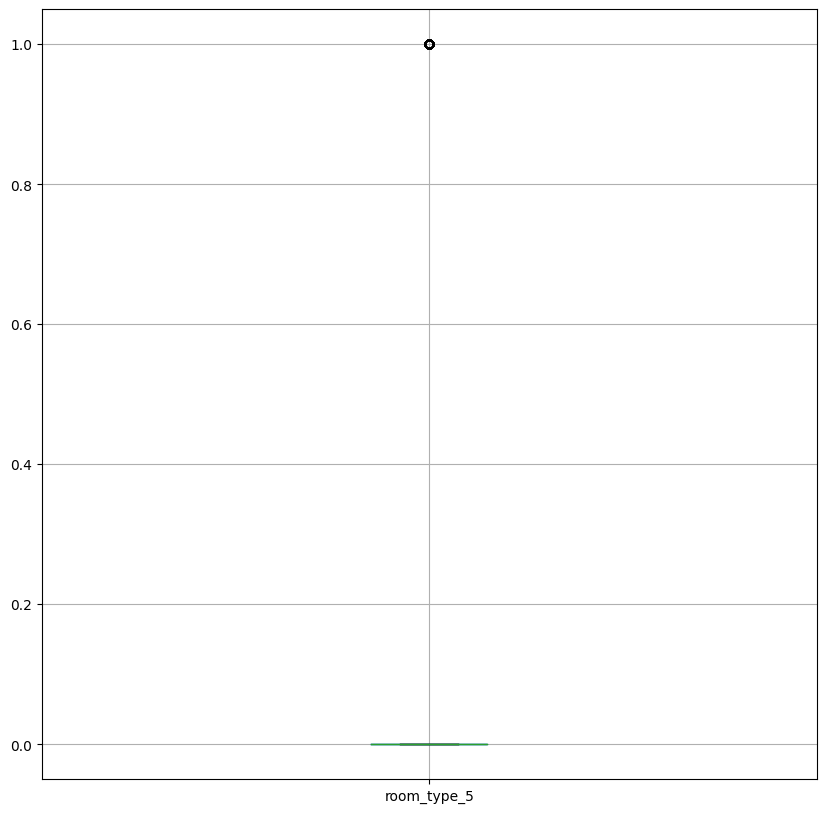

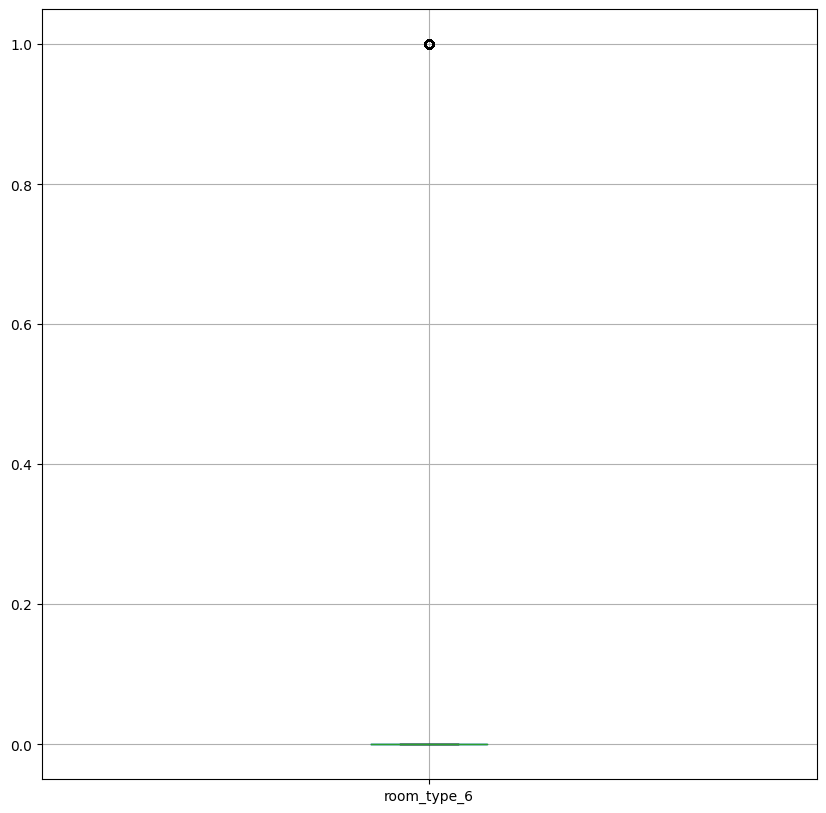

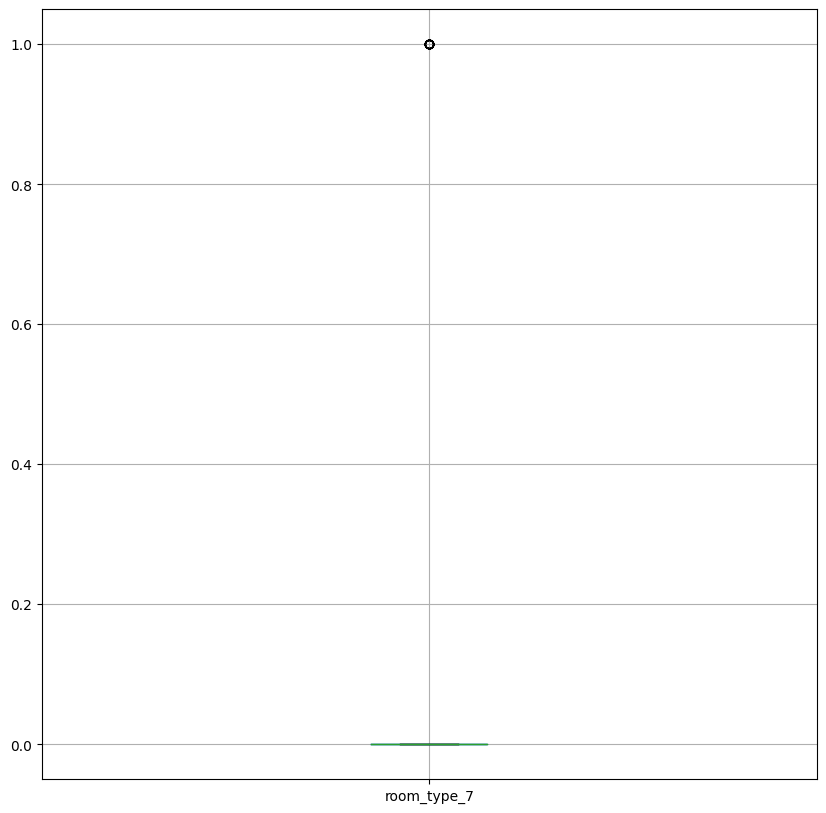

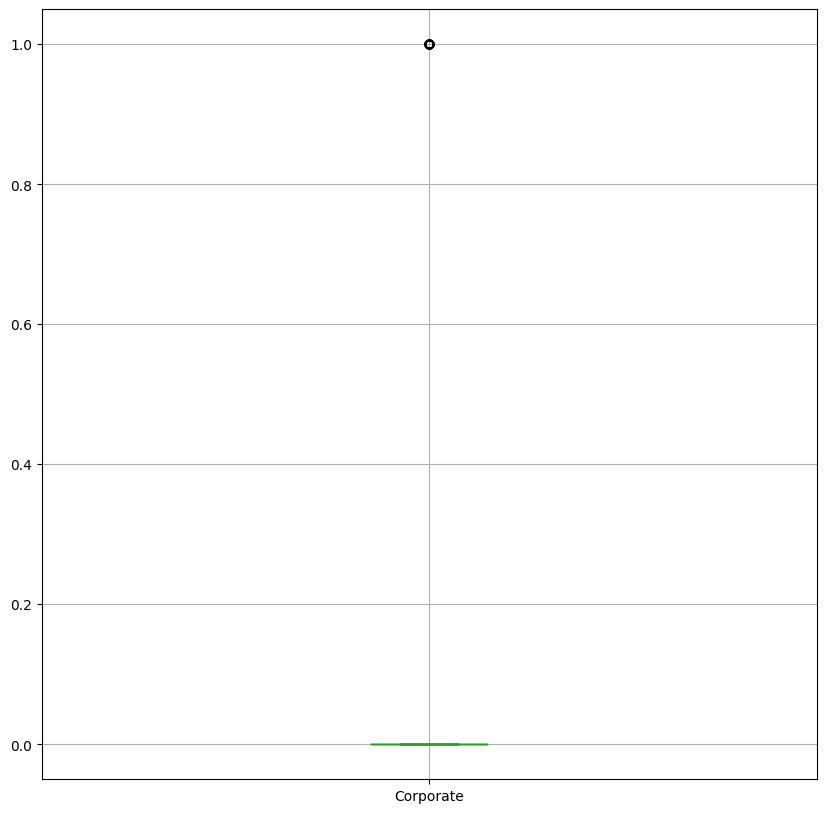

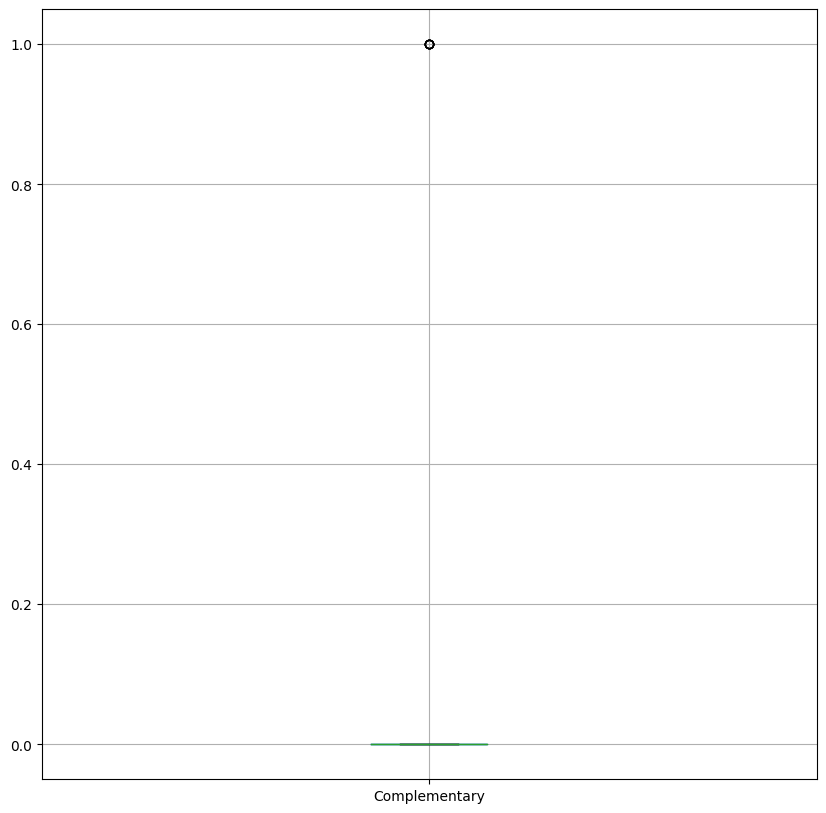

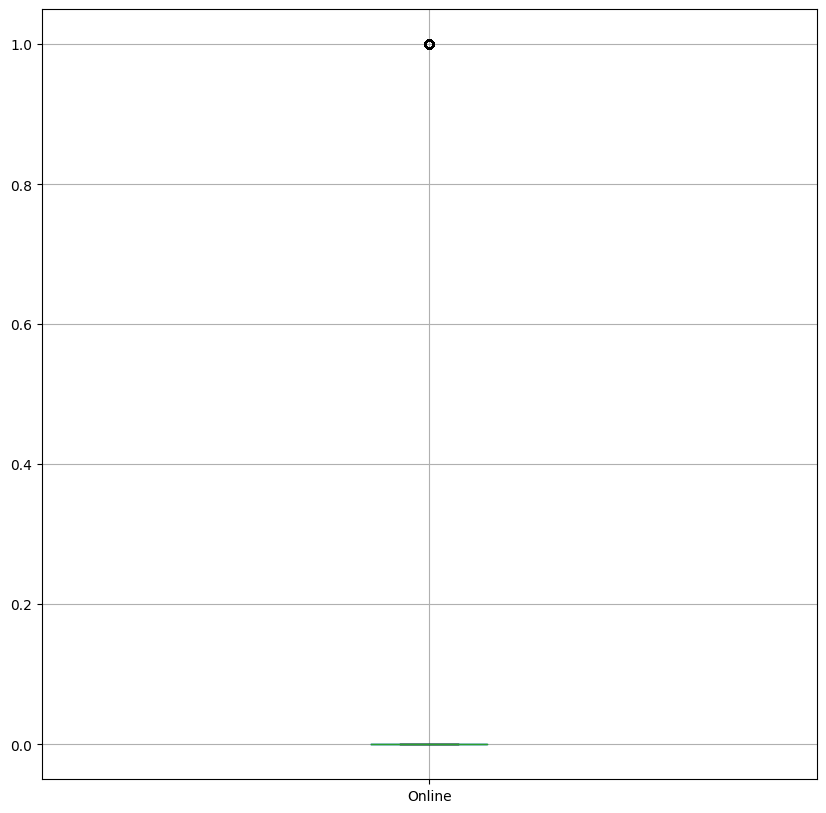

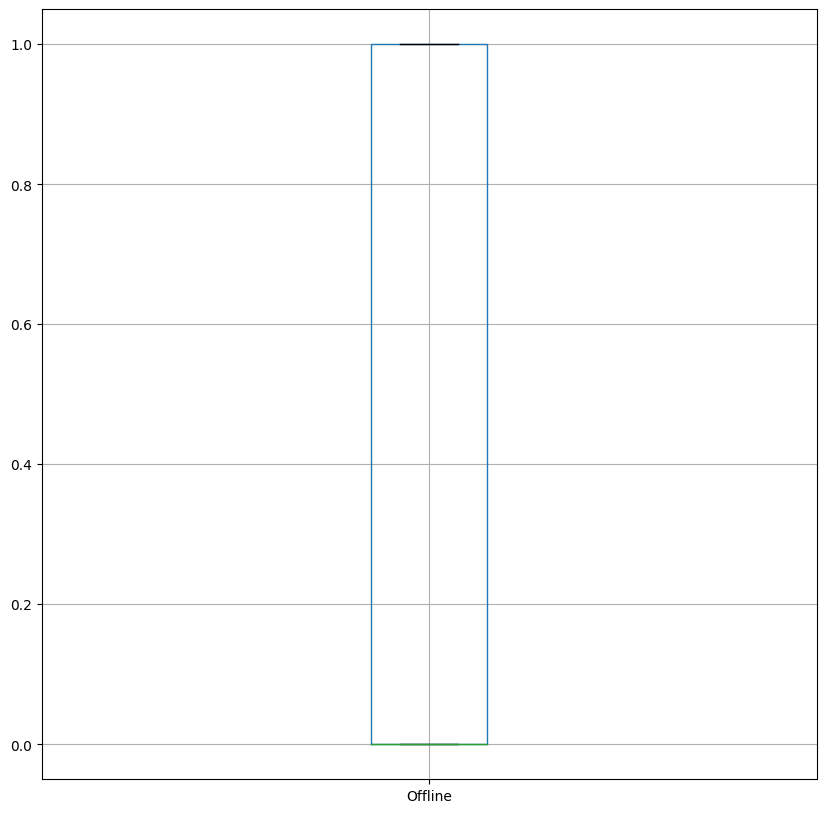

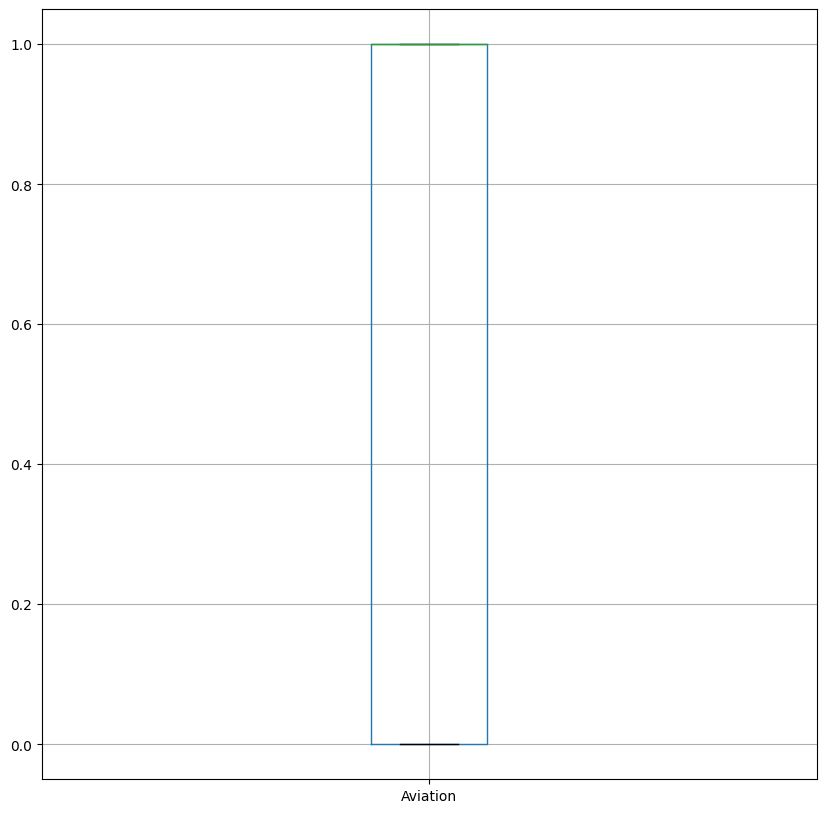

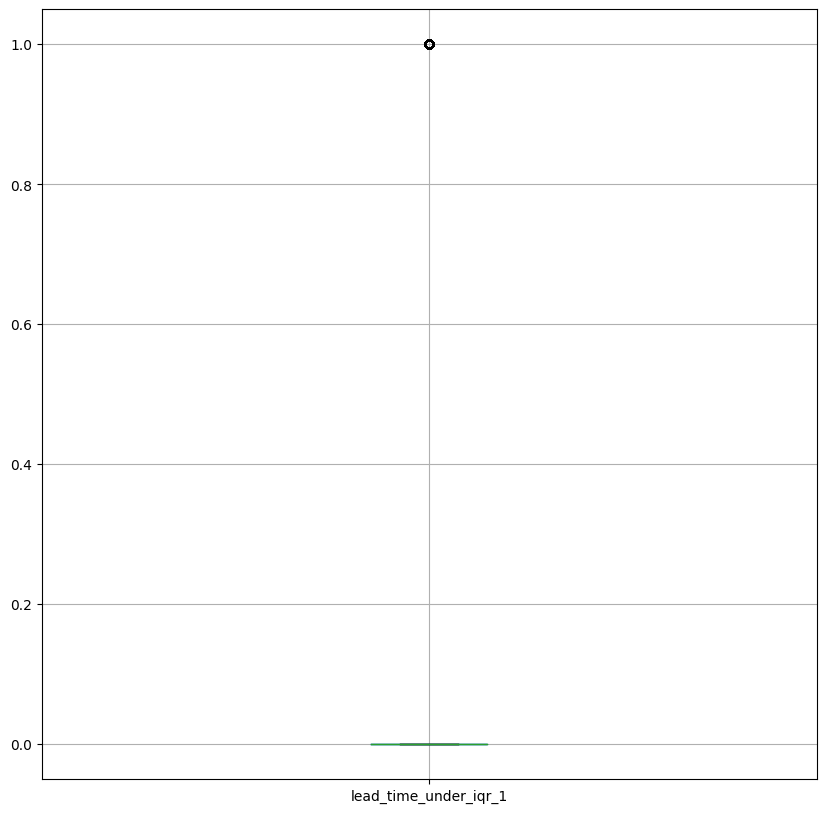

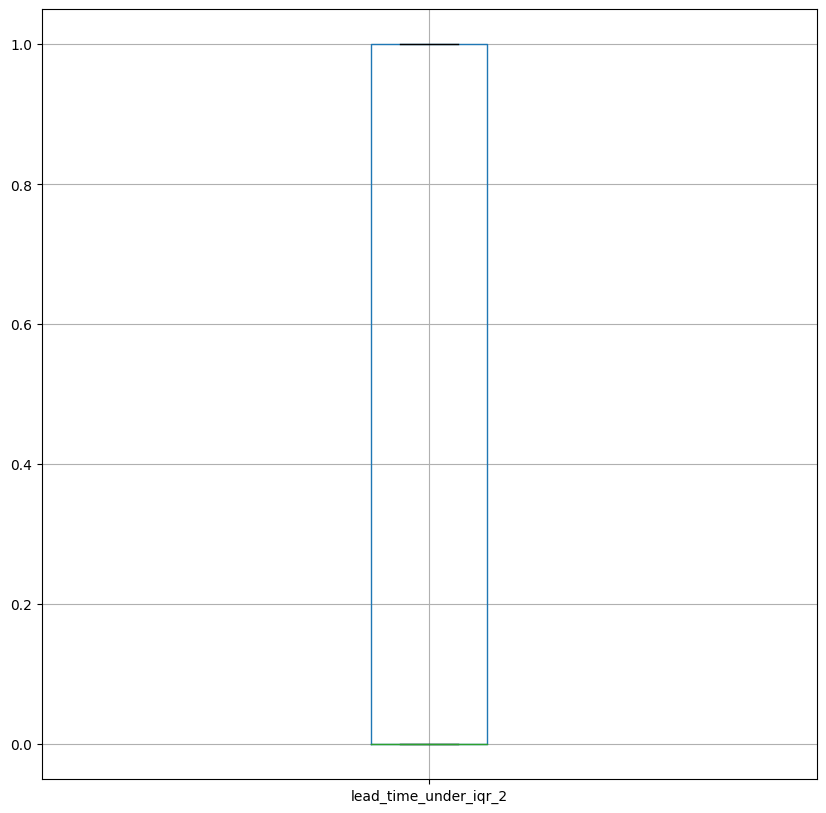

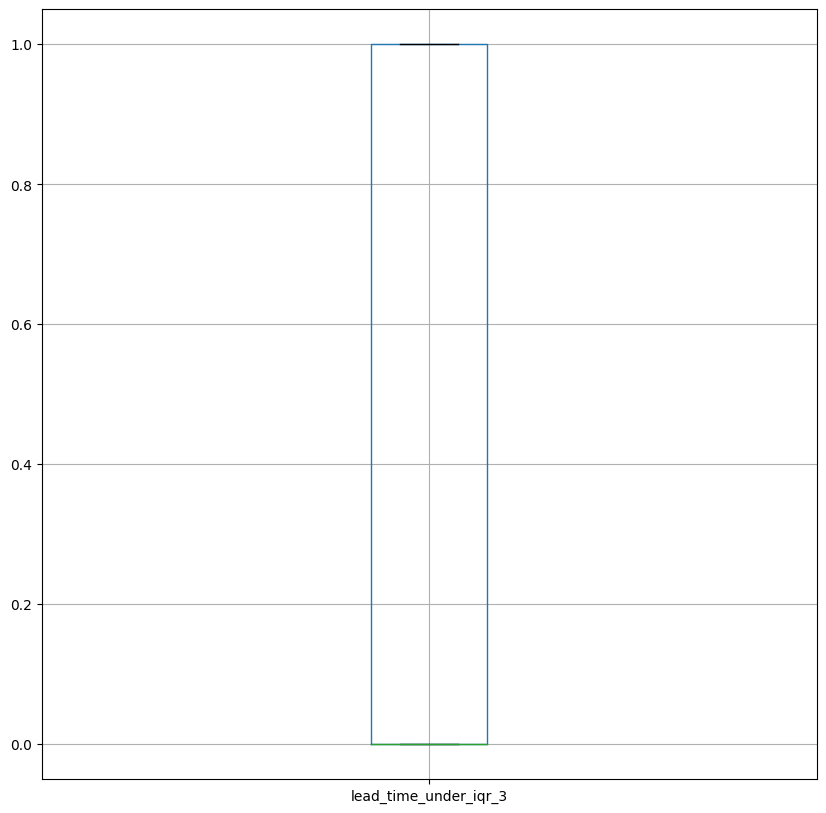

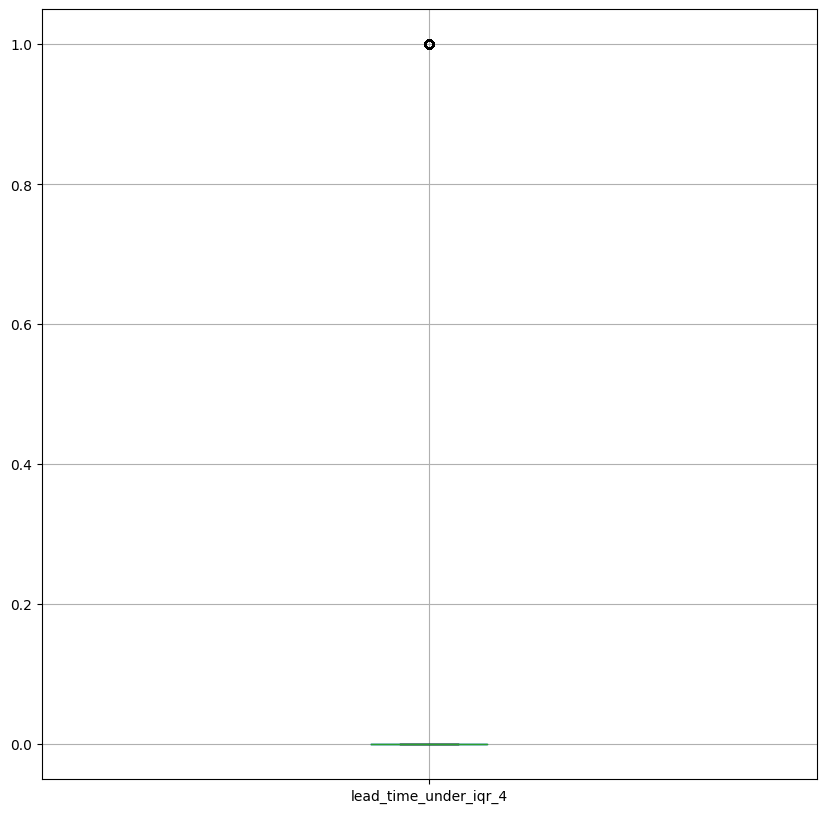

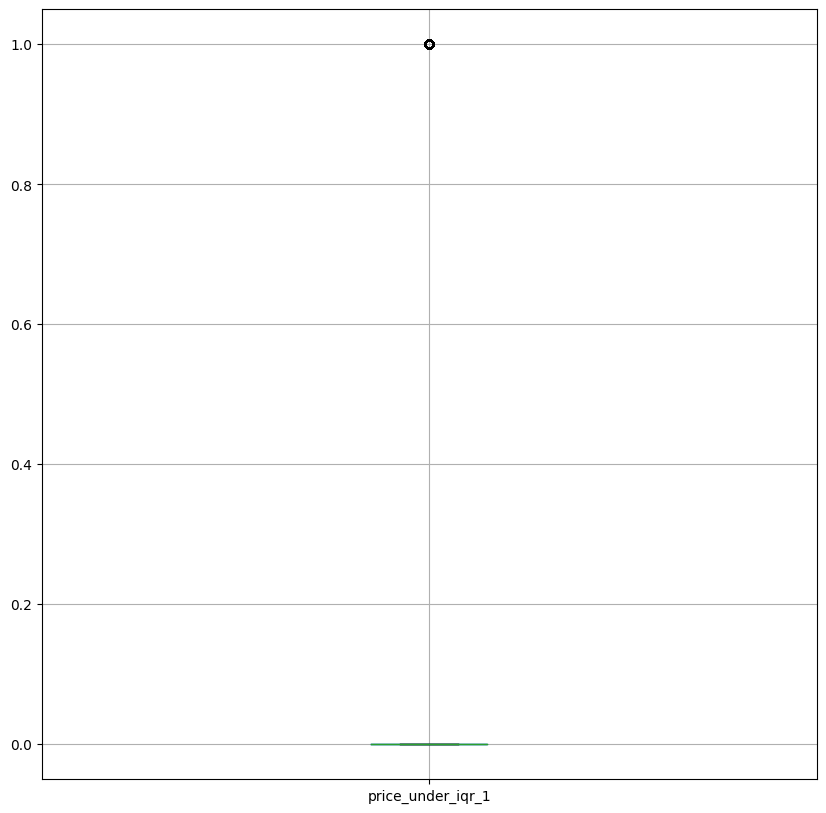

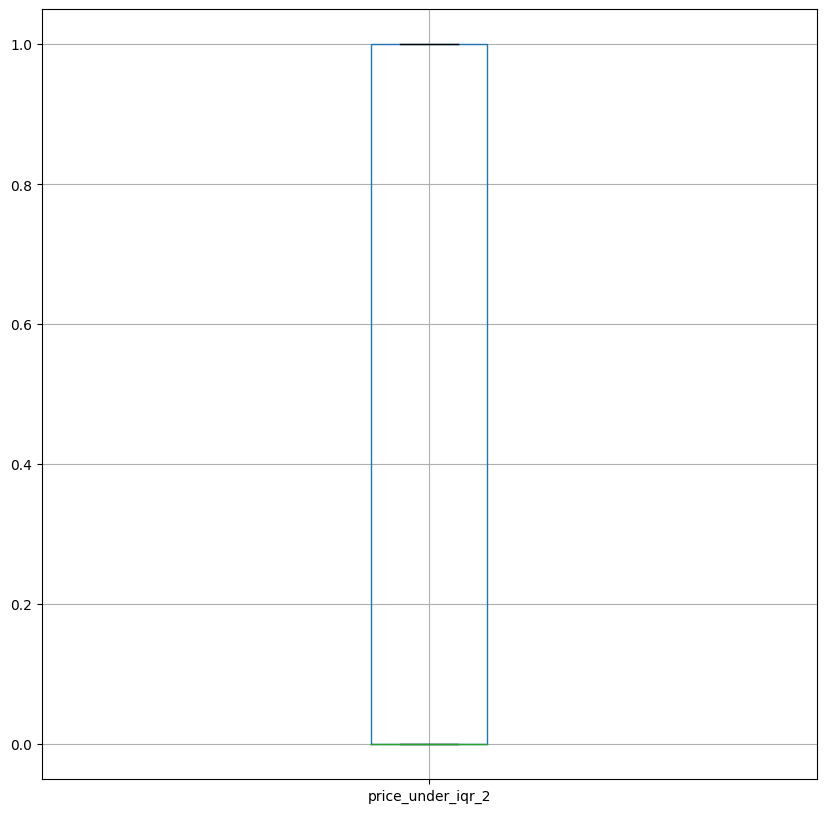

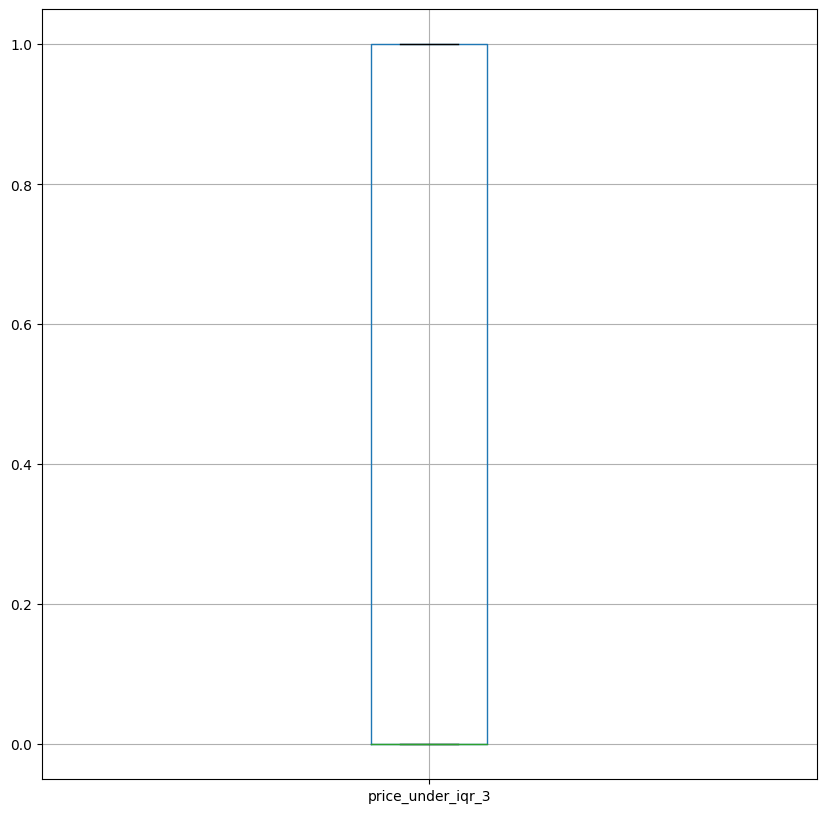

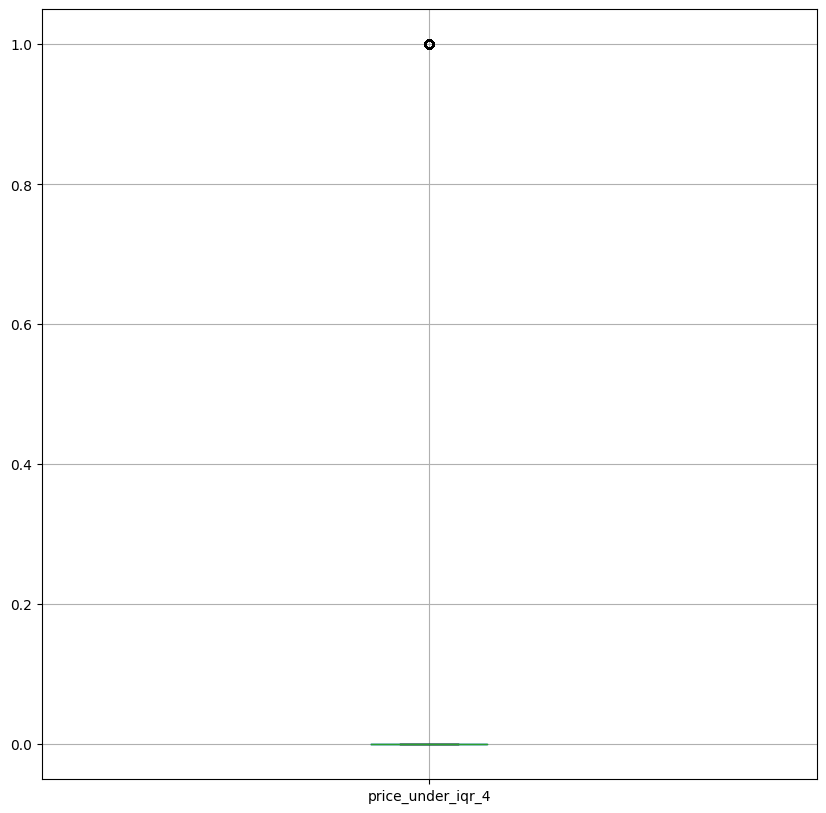

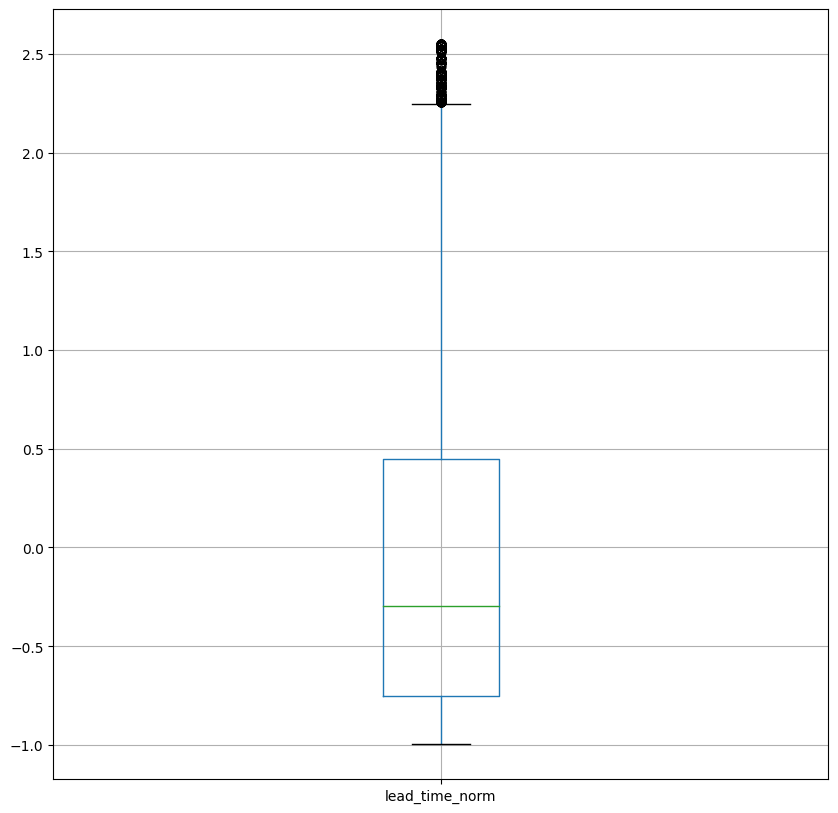

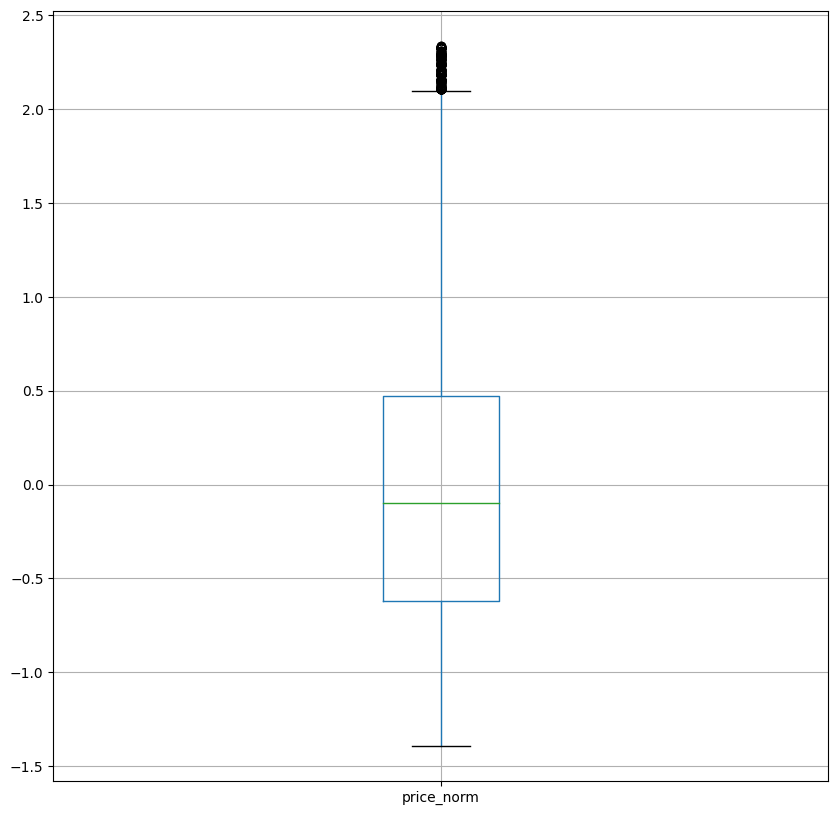

In [4]:
feat_name = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
             'no_of_week_nights',  'required_car_parking_space',
             'lead_time', 'arrival_year', 'arrival_month',
             'arrival_date', 'repeated_guest',
             'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
             'avg_price_per_room', 'no_of_special_requests', 
             'meal_type_1', 'meal_type_2', 'meal_type_3', 'meal_type_4',
             'room_type_1', 'room_type_2', 'room_type_3', 'room_type_4',
             'room_type_5', 'room_type_6', 'room_type_7', 'Corporate',
             'Complementary', 'Online', 'Offline', 'Aviation',
             'lead_time_under_iqr_1', 'lead_time_under_iqr_2',
             'lead_time_under_iqr_3', 'lead_time_under_iqr_4', 'price_under_iqr_1',
             'price_under_iqr_2', 'price_under_iqr_3', 'price_under_iqr_4',
             'lead_time_norm', 'price_norm']

for i in feat_name:
    plt.figure(figsize=(10, 10))
    boxplot = data.boxplot(column=[i])
    plt.show()


In [30]:
len_data = len(data)
pure_data = pd.read_csv('final_train.csv')
outlier = int(0.025 * len_data)
print(len(pure_data))
print(len_data)
data.head()


25392
25392


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,lead_time_under_iqr_1,lead_time_under_iqr_2,lead_time_under_iqr_3,lead_time_under_iqr_4,price_under_iqr_1,price_under_iqr_2,price_under_iqr_3,price_under_iqr_4,lead_time_norm,price_norm
0,INN29581,2,0,1,3,Meal Plan 1,0,Room_Type 1,200,2018,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.336372,-0.357480
1,INN06326,2,0,1,3,Meal Plan 1,0,Room_Type 1,79,2018,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.074773,-0.357480
2,INN33900,2,0,1,4,Meal Plan 1,0,Room_Type 4,78,2018,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.086436,-0.115087
3,INN00721,2,0,2,0,Meal Plan 1,0,Room_Type 1,61,2017,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.284696,-0.356054
4,INN22121,2,1,0,4,Meal Plan 1,0,Room_Type 1,201,2018,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.348035,-0.604721


In [44]:
data = pd.read_csv('final_train.csv')

In [45]:
sort_data = data.sort_values(by=['no_of_week_nights'])
sort_data.head()
print(sort_data.shape)
len_sort_data = int(len(sort_data))
outlier = int(len_sort_data * 0.025)
first_sort = sort_data.iloc[outlier:len_sort_data - outlier, :]
print(first_sort.shape)


(25392, 45)
(24124, 45)


In [46]:
first_sort = first_sort.sort_values(by=['lead_time'])
print(first_sort.shape)
len_sort_data = int(len(first_sort))
outlier = int(len_sort_data * 0.025)
second_sort = first_sort.iloc[outlier:len_sort_data - outlier, :]
print(second_sort.shape)


(24124, 45)
(22918, 45)


In [47]:
second_sort = second_sort.sort_values(by=['avg_price_per_room'])
print(second_sort.shape)
len_sort_data = int(len(second_sort))
outlier = int(len_sort_data * 0.025)
third_sort = second_sort.iloc[outlier:len_sort_data - outlier, :]
print(third_sort.shape)


(22918, 45)
(21774, 45)


In [49]:
third_sort.to_csv('del_outlier.csv', index=False)


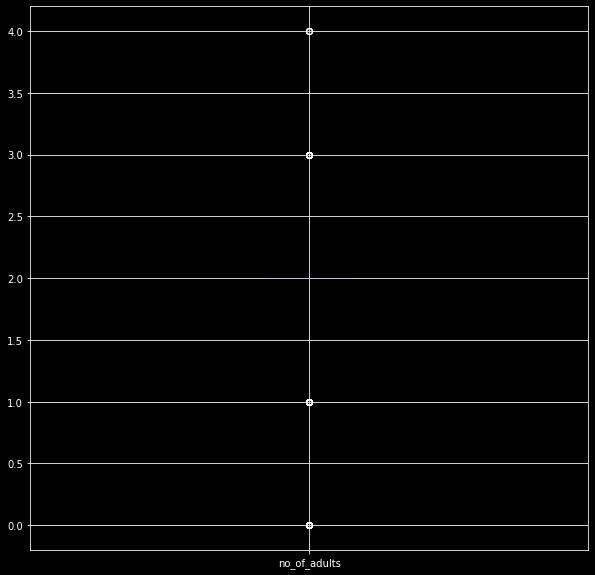

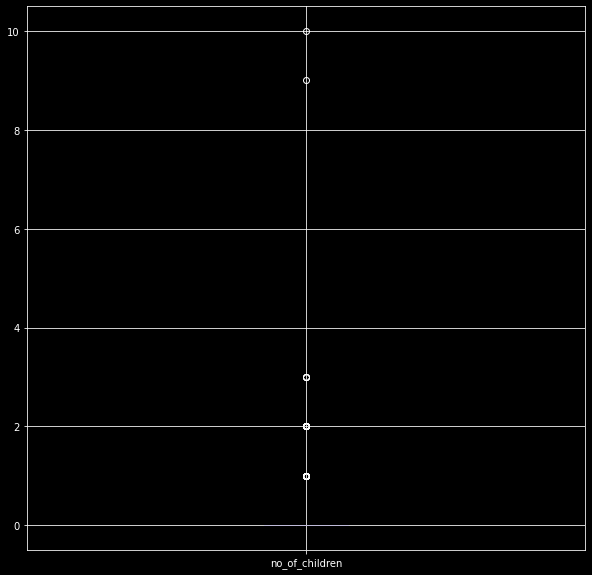

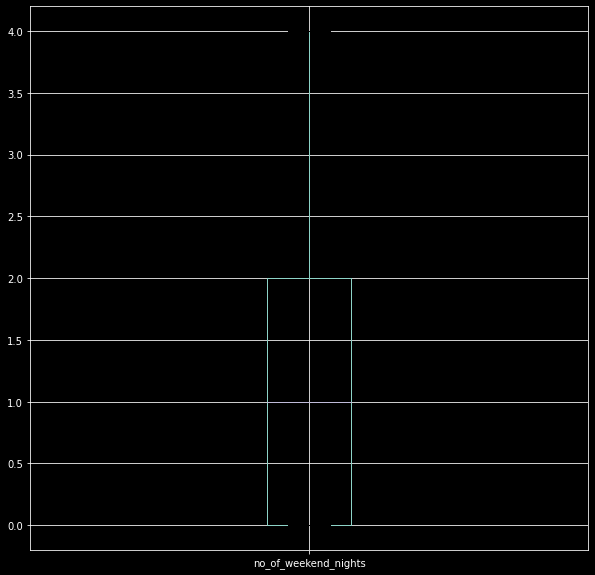

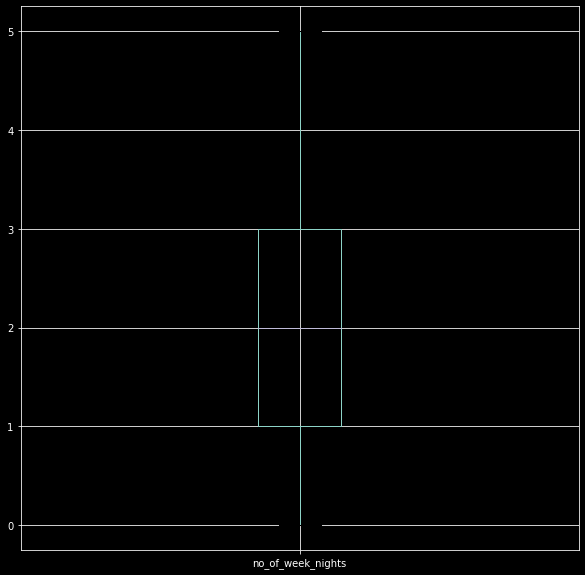

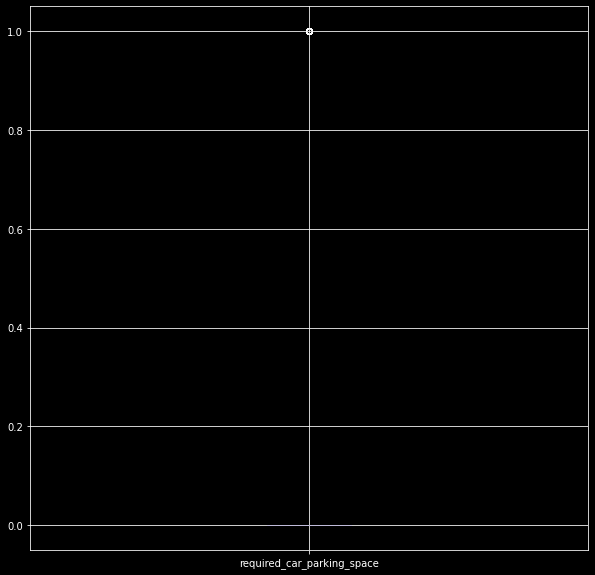

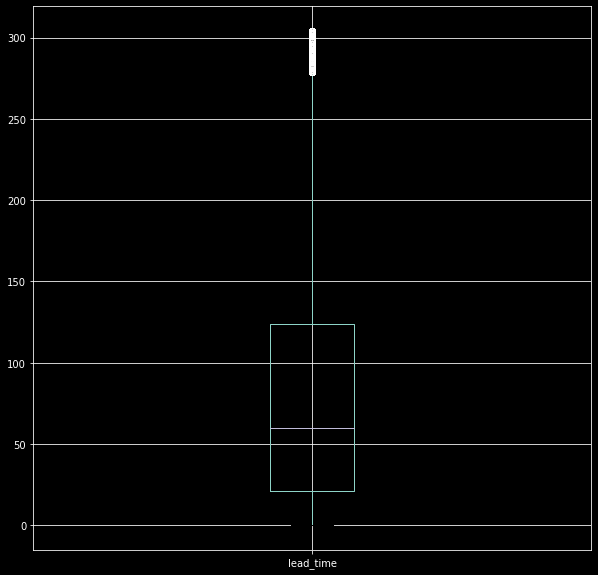

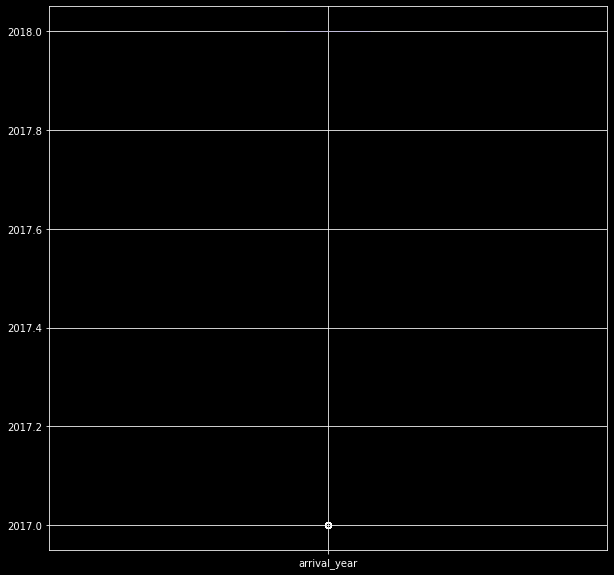

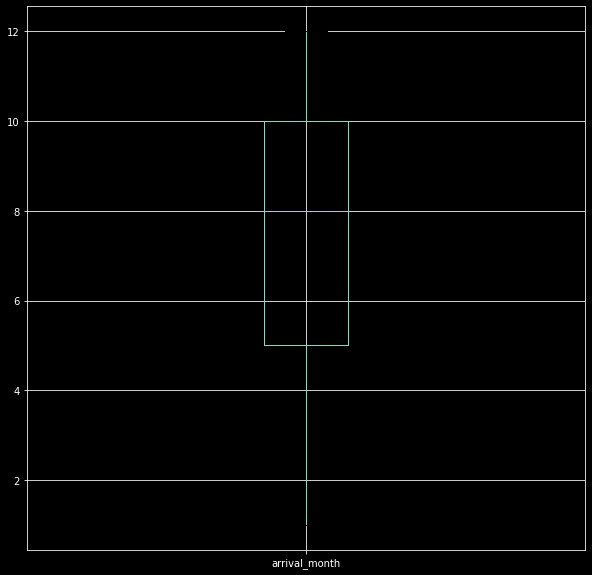

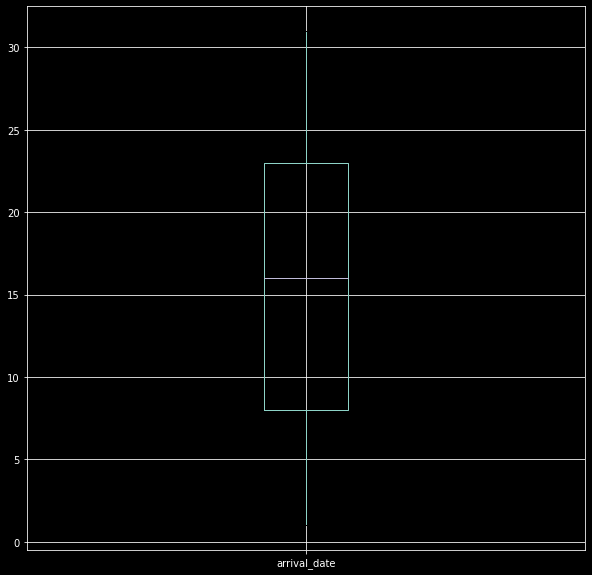

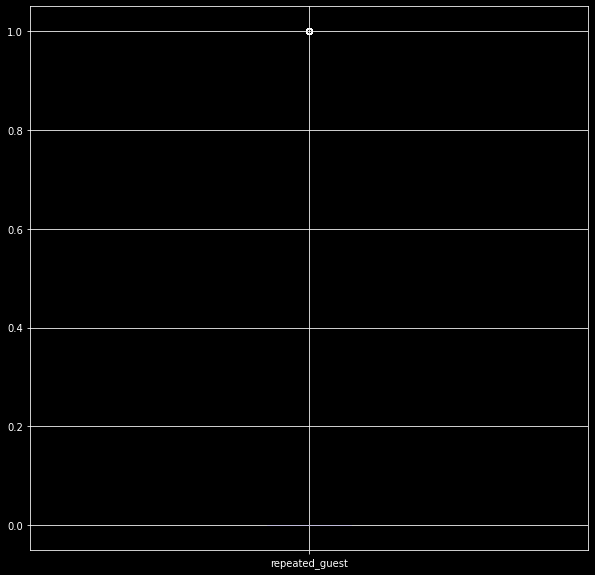

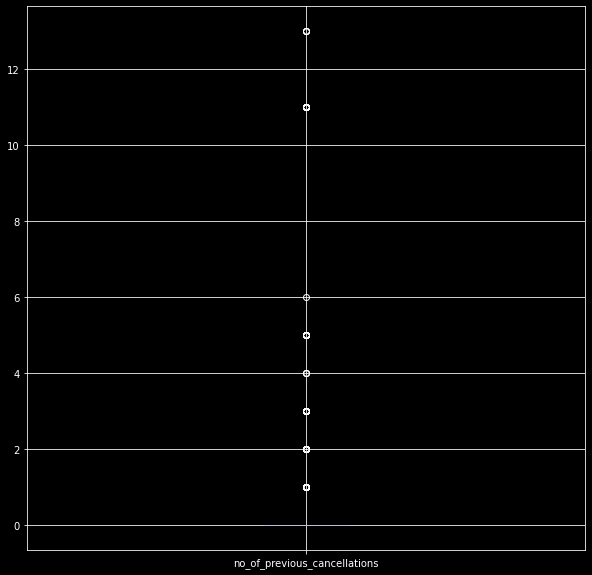

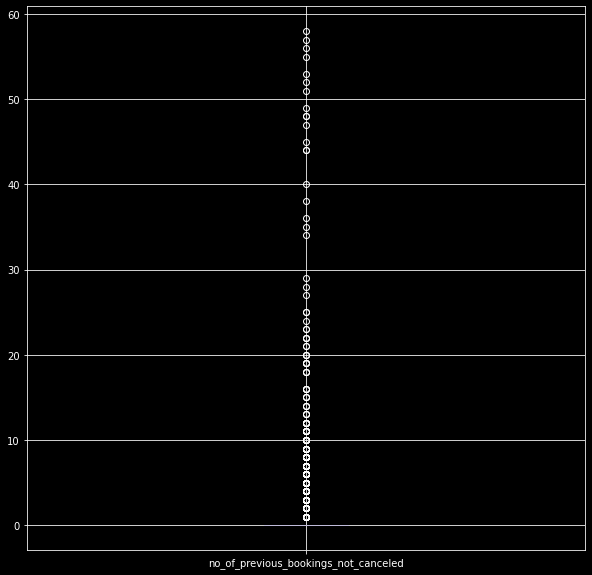

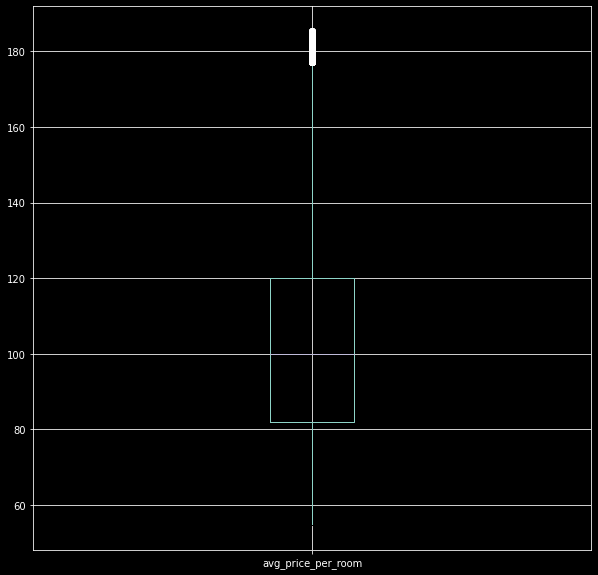

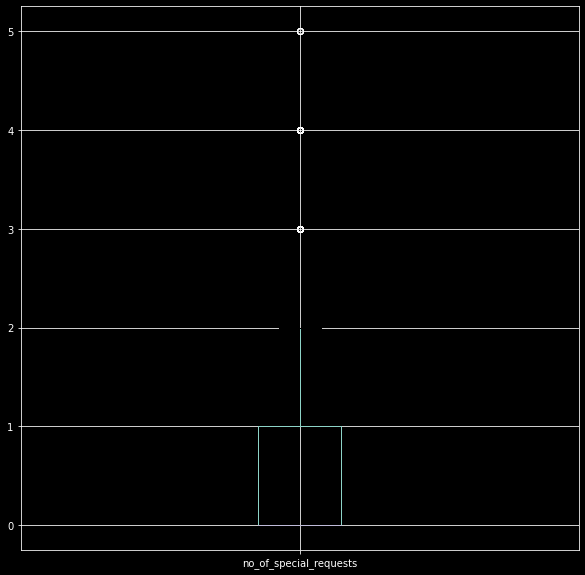

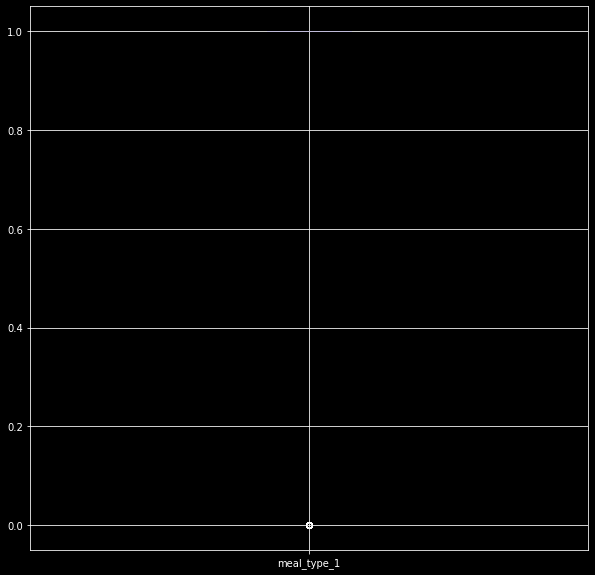

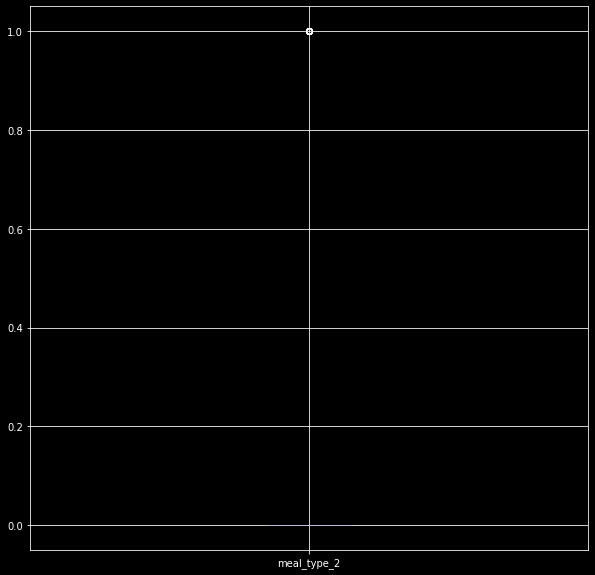

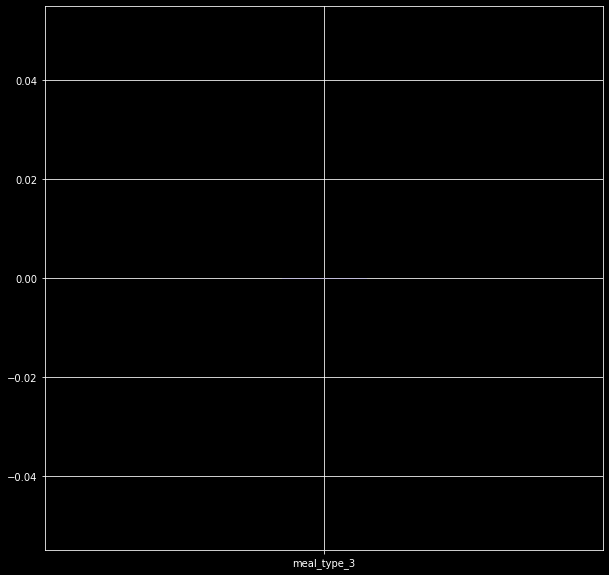

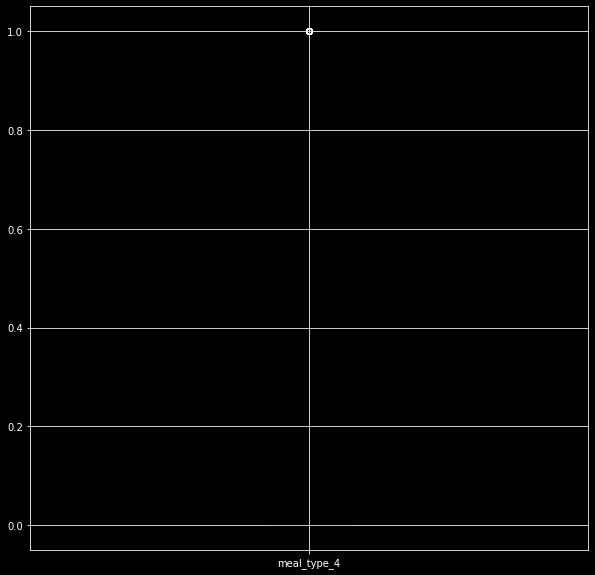

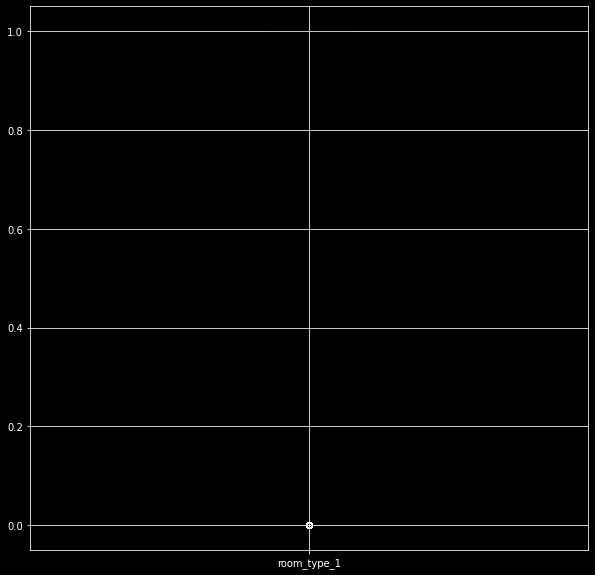

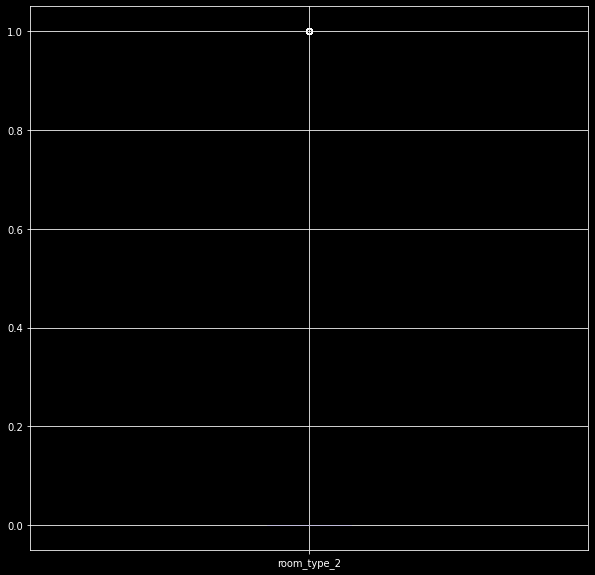

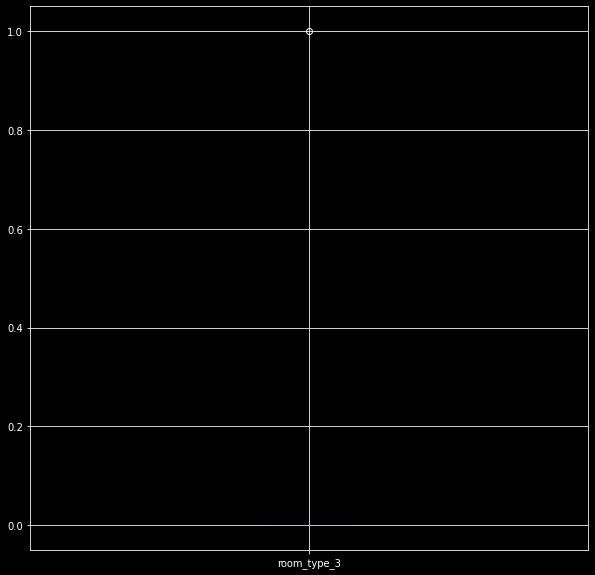

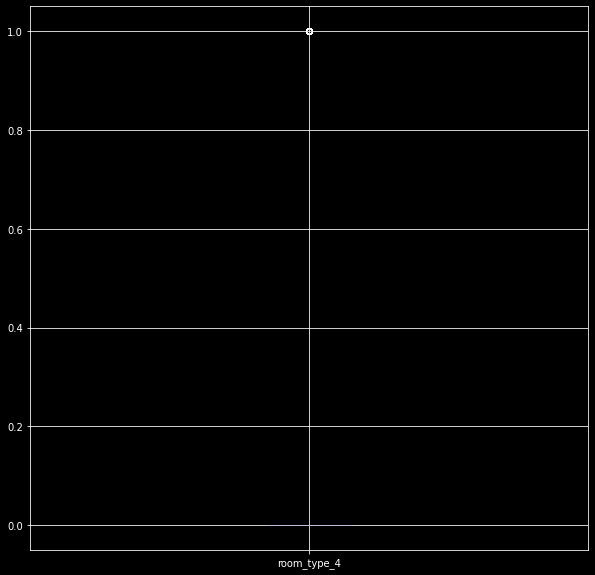

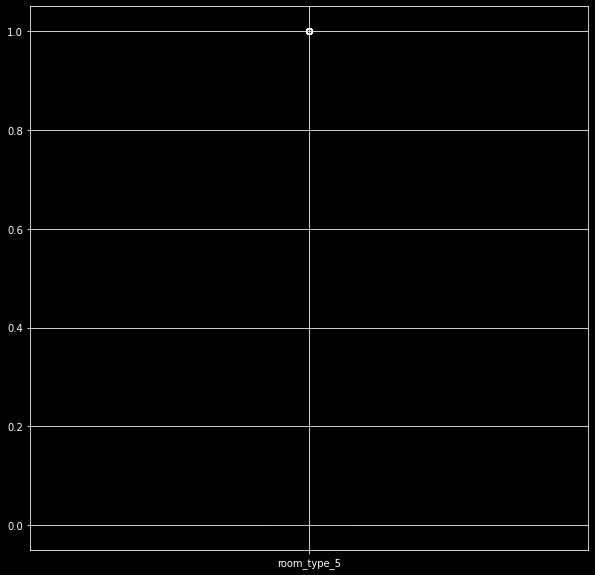

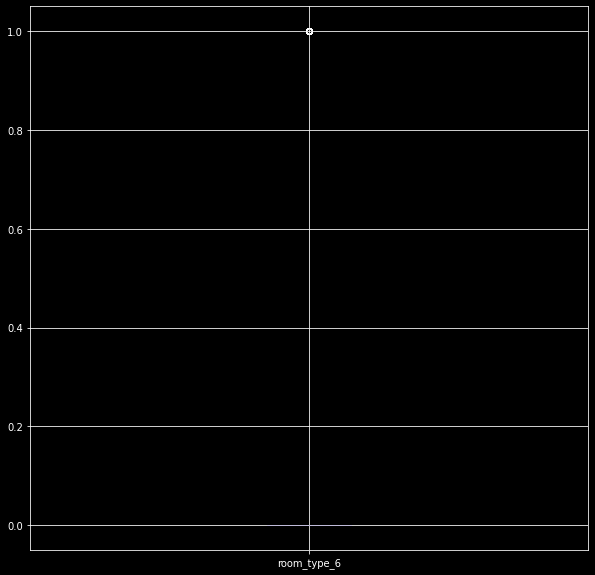

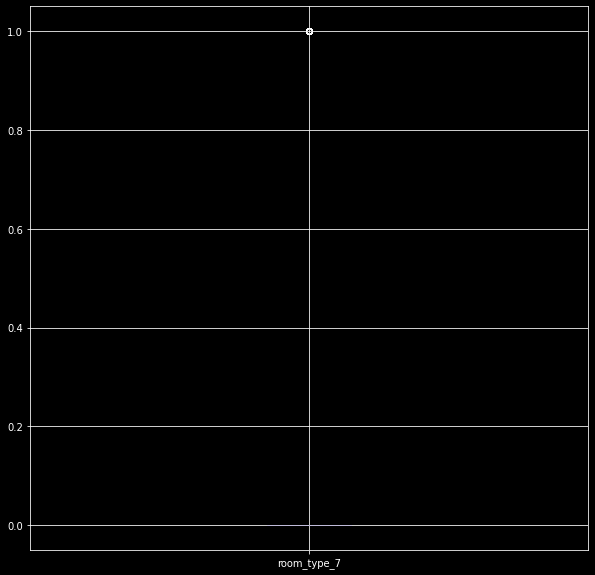

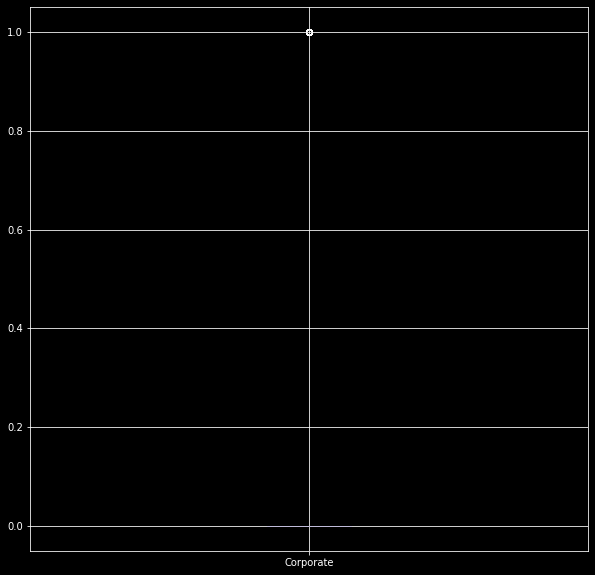

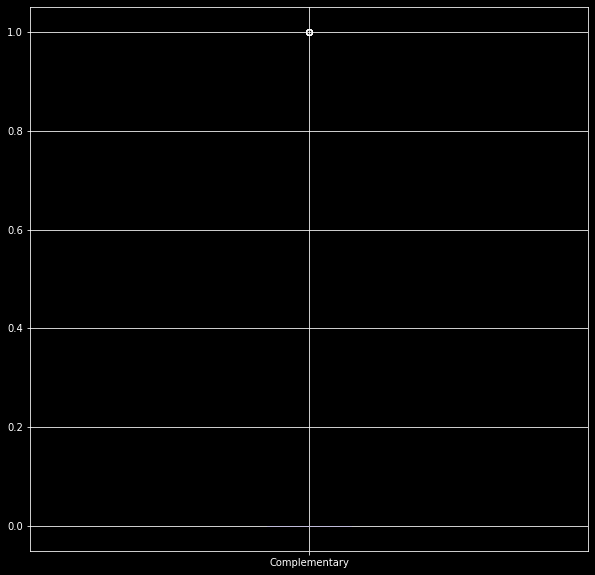

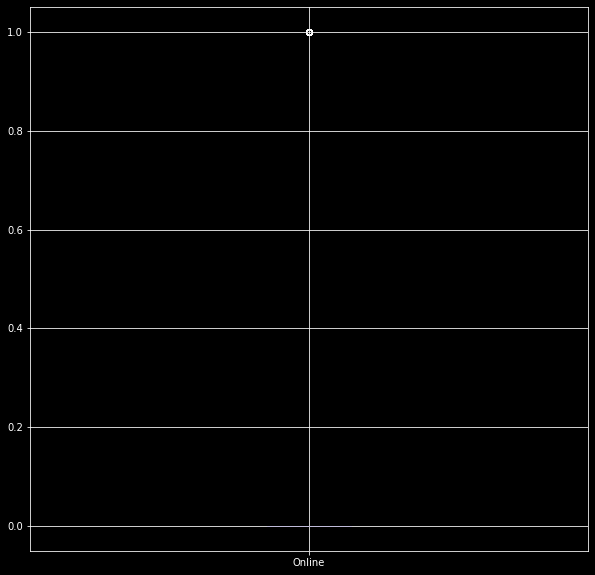

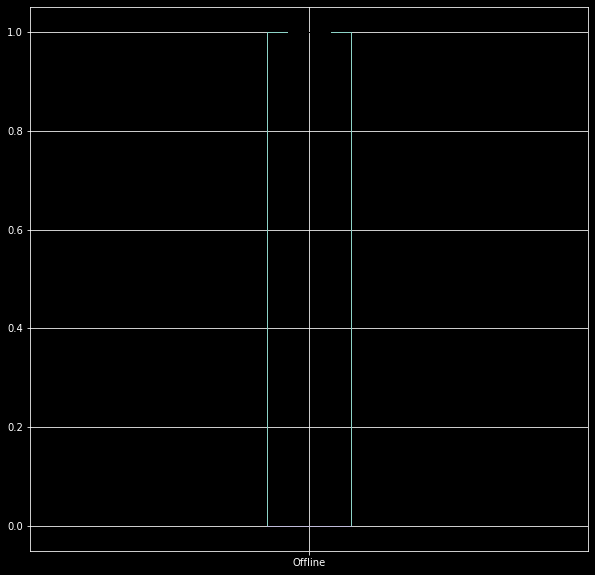

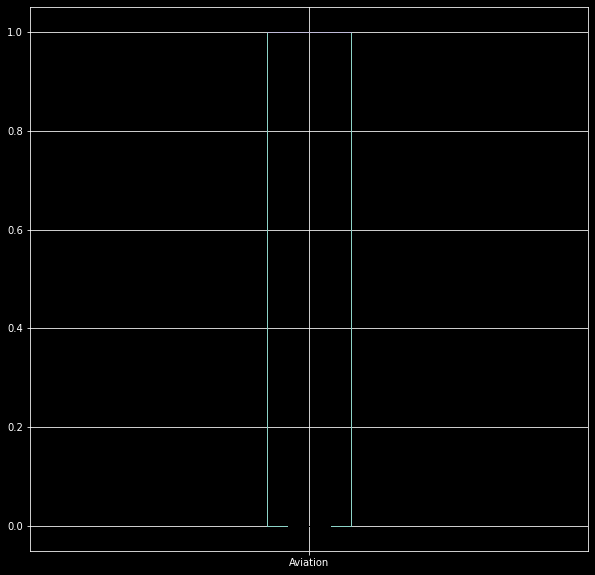

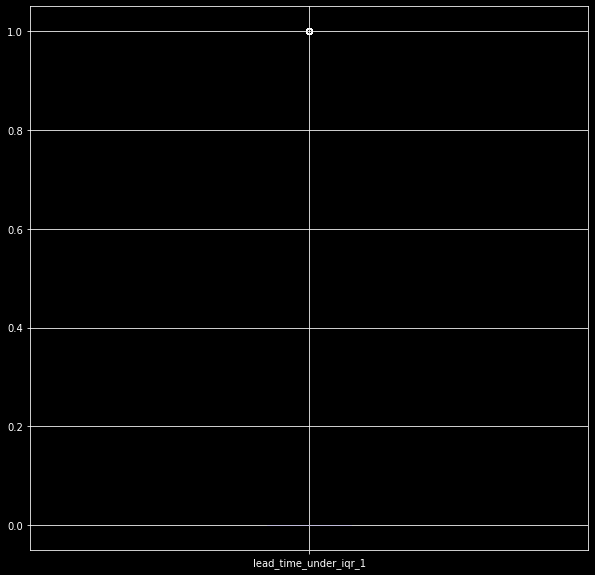

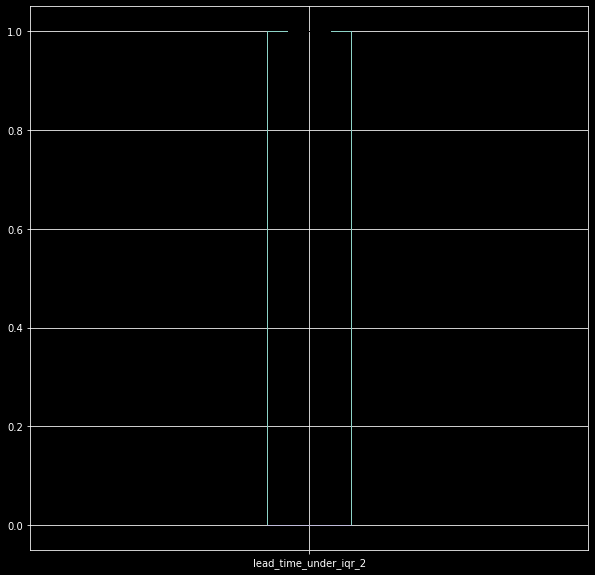

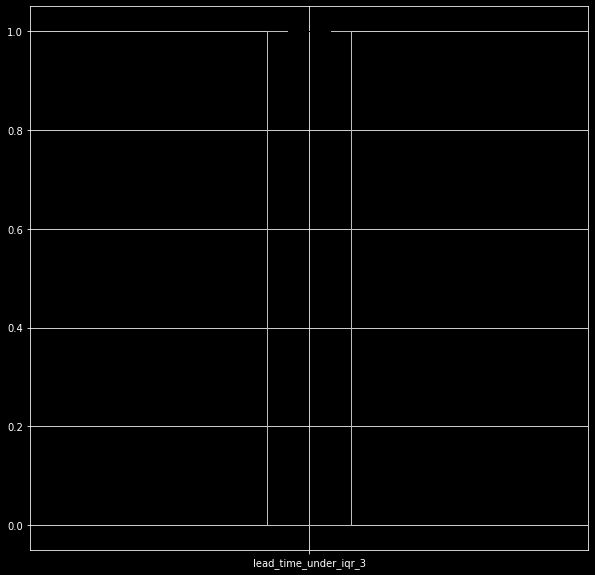

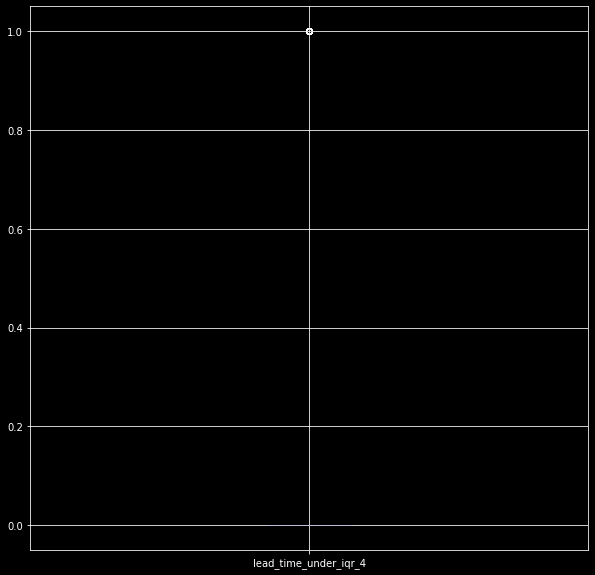

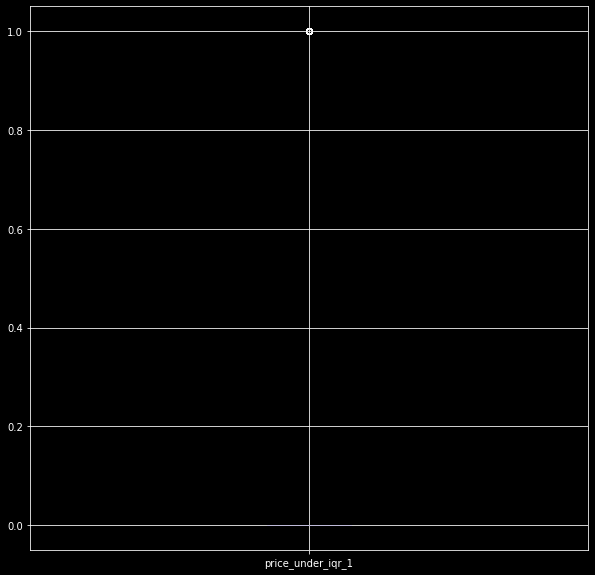

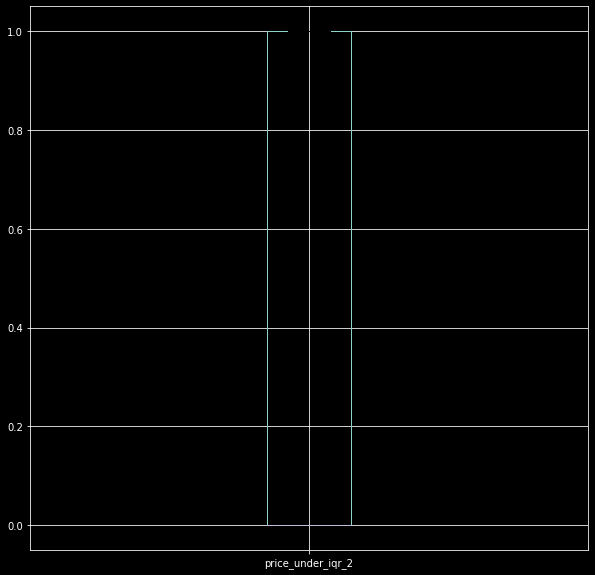

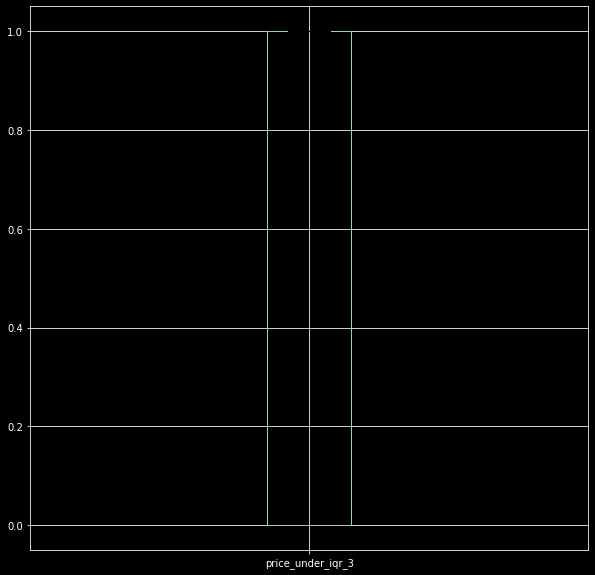

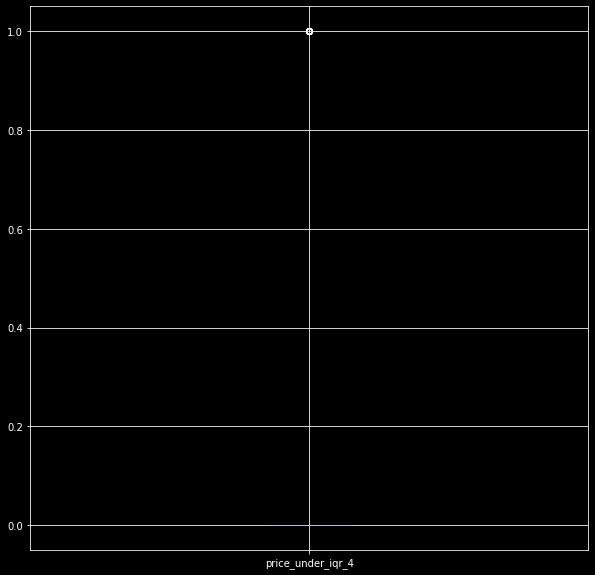

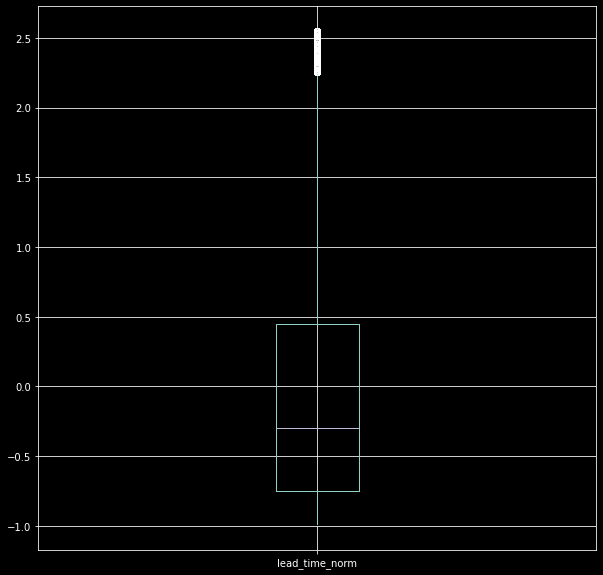

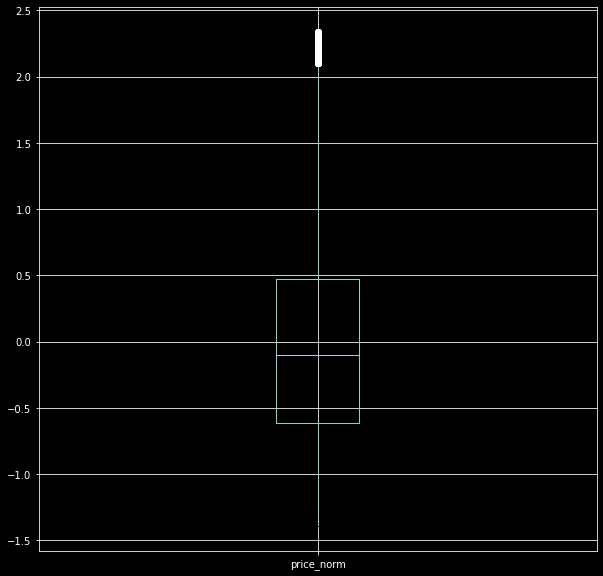

In [50]:
feat_name = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
             'no_of_week_nights',  'required_car_parking_space',
             'lead_time', 'arrival_year', 'arrival_month',
             'arrival_date', 'repeated_guest',
             'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
             'avg_price_per_room', 'no_of_special_requests',
             'meal_type_1', 'meal_type_2', 'meal_type_3', 'meal_type_4',
             'room_type_1', 'room_type_2', 'room_type_3', 'room_type_4',
             'room_type_5', 'room_type_6', 'room_type_7', 'Corporate',
             'Complementary', 'Online', 'Offline', 'Aviation',
             'lead_time_under_iqr_1', 'lead_time_under_iqr_2',
             'lead_time_under_iqr_3', 'lead_time_under_iqr_4', 'price_under_iqr_1',
             'price_under_iqr_2', 'price_under_iqr_3', 'price_under_iqr_4',
             'lead_time_norm', 'price_norm']

for i in feat_name:
    plt.figure(figsize=(10, 10))
    boxplot = third_sort.boxplot(column=[i])
    plt.show()


In [37]:
can_drop = pd.read_csv('final_train.csv')
print(len(can_drop))
print(can_drop.shape)
# new_data = can_drop.drop(
#     can_drop.iloc[outlier:len(can_drop) - outlier, can_drop.keys()], axis=0)
# print(len(new_data))
# print(new_data.shape)
can_drop.iloc[outlier:len(can_drop) - outlier, :]


25392
(25392, 45)


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,lead_time_under_iqr_1,lead_time_under_iqr_2,lead_time_under_iqr_3,lead_time_under_iqr_4,price_under_iqr_1,price_under_iqr_2,price_under_iqr_3,price_under_iqr_4,lead_time_norm,price_norm
634,INN15591,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.984437,-1.240075
635,INN34121,2,0,0,4,Meal Plan 1,0,Room_Type 4,181,2018,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.114787,0.006109
636,INN28854,3,0,1,4,Meal Plan 1,0,Room_Type 4,138,2018,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.613306,1.078341
637,INN01596,2,0,2,2,Not Selected,0,Room_Type 1,6,2018,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.926126,-0.527155
638,INN26942,2,0,0,3,Meal Plan 1,0,Room_Type 1,93,2018,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.088500,-0.376016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24753,INN06239,2,0,2,5,Meal Plan 1,0,Room_Type 4,105,2018,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.228448,0.821690
24754,INN15184,2,0,1,3,Meal Plan 1,0,Room_Type 1,153,2018,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.788241,0.866746
24755,INN24215,1,0,0,1,Meal Plan 1,0,Room_Type 1,55,2018,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.354670,-0.698256
24756,INN17145,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2018,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.984437,-1.097491
